### Imports

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline 
mpl.rcParams['figure.dpi'] = 300

In [3]:
from sklearn.preprocessing import Normalizer

In [4]:
from chart_studio import plotly
import plotly.figure_factory as ff

In [5]:
pd.options.display.max_rows = 4000
pd.options.display.max_columns = 4000

In [ ]:
DATA_VERSION = 'v4'

In [6]:
gov_arch_csv = '../data/' + DATA_VERSION + '/communities_data_prepped.csv'

In [ ]:
fig_dir = '../' + DATA_VERSION + '-fig/fig-communities/SCCS/'

In [7]:
gov_df = pd.read_csv(gov_arch_csv)

In [ ]:
# SCCS only
gov_df = gov_df.loc[gov_df['is_SCCS'] == 1]

In [8]:
gov_df.head()

Name                                       Institutions  \
0  Aedui (Celtic Oppida)             Senatus,Elected magistrates,Assemblies   
1                   Akha  Council of Elders,Village Founder-Leader (dzom...   
2                 Amalfi  Prefetturii/ Conti/ Dogi,Sedile di congrega,Ta...   
3            Arab nomads                 shaykh or sayyid,shura or mashwara   
4                  Assur                  King,Alum,Limmum,Scribe,City hall   

                                           Mechanism  \
0  Election,Council (central) ,Assembly (central)...   
1  Leader (first among equals),Gerontocracy,Blood...   
2  Election,Magistrate/official,Heredity,Constitu...   
3  Consensus,Consultation,Autocratic Leader/Chief...   
4  President/Consul/Chief Executive,Assembly (cen...   

                                               Notes  \
0  There are many Celtic oppida throughout northe...   
1                               see Institutions tab   
2  Camera, M, p. 29 ("La sua popolazione che nel ...   
3  Nomadic Bedouin society governed by rulers sel...   
4  Independent city-state. Constitutional monarch...   

                                           Time span  \
0                                 2nd-1st century BC   
1                             20th century - Present   
2                                4th-12th century AD   
3  1st-7th century AD\n(start date is arbitrary, ...   
4                    19th century BC\n(1920-1800 BC)   

                    Geography                 Size  \
0                Europe North  100,001 - 1,000,000   
1             Asia Southeast      10,001 - 100,000   
2                 Europe West     10,001 - 100,000   
3                 Middle East              Unknown   
4  Europe Southeast, Anatolia       1,001 - 10,000   

                                              Source Metanotes  \
0  Collis, “Celtic” Oppida, in Hansen, A Comparat...       NaN   
1  Main: \nKammerer, Cornelia Ann (1985/86), Gate...       NaN   
2  Camera, M. Istoria della città e costiera di A...       NaN   
3  Stasavage, David (2020), The Decline and Rise ...       NaN   
4  Larsen, M. T. The Old Assyrian City-State in H...       NaN   

                                      Heterogeneity   \
0                                                NaN   
1  Informal inclusion,Gender groups,Informal powe...   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                         FC comments     expert check  \
0                                    Edited March 23              NaN   
1                                      Edited May 23              NaN   
2      Edited March 23 (could use more info on CGIs)              NaN   
3  Edited Feb 23 (could use additional sources fo...              NaN   
4                                      Edited Mar 23  Giacomo CHECKED   

   Time span: Start  Time span: End  \
0              -200               0   
1              1900            2023   
2               300            1200   
3                 0             700   
4             -1920           -1800   

   enforcement_mechanisms_include_graduated_sanctions  \
0                                                  0    
1                                                  0    
2                                                  0    
3                                                  0    
4                                                  0    

   access_mechanisms_include_dreaming  \
0                                   0   
1                                   1   
2                                   0   
3                                   0   
4                                   0   

   decision_making_mechanisms_include_oath  \
0                                        0   
1                                        0   
2                                        0   
3                          

In [9]:
gov_df.dtypes

Name                                                                               object
Institutions                                                                       object
Mechanism                                                                          object
Notes                                                                              object
Time span                                                                          object
Geography                                                                          object
Size                                                                               object
Source                                                                             object
Metanotes                                                                          object
Heterogeneity                                                                      object
FC comments                                                                        object
expert che

## Descriptive analysis

## Histograms

In [10]:
list(gov_df.columns)

['Name',
 'Institutions',
 'Mechanism',
 'Notes',
 'Time span',
 'Geography',
 'Size',
 'Source',
 'Metanotes',
 'Heterogeneity ',
 'FC comments',
 'expert check',
 'Time span: Start',
 'Time span: End',
 'enforcement_mechanisms_include_graduated_sanctions',
 'access_mechanisms_include_dreaming',
 'decision_making_mechanisms_include_oath',
 'decision_making_mechanisms_include_board_committee',
 'enforcement_mechanisms_include_tribunal_court_',
 'enforcement_mechanisms_include_civil_disobedience',
 'decision_making_mechanisms_include_vote_by_show_of_hands',
 'decision_making_mechanisms_include_remunerated_position',
 'access_mechanisms_include_life_appointment',
 'decision_making_mechanisms_include_deliberation',
 'decision_making_mechanisms_include_assembly_local',
 'enforcement_mechanisms_include_mediation',
 'decision_making_mechanisms_include_leader_first_among_equals',
 'access_mechanisms_include_enfranchisement',
 'decision_making_mechanisms_include_autocratic_leader_chief_bound',

In [11]:
mechanisms_list = [x for x in gov_df.columns if 'mechanisms' in x]
mechanisms_list

['enforcement_mechanisms_include_graduated_sanctions',
 'access_mechanisms_include_dreaming',
 'decision_making_mechanisms_include_oath',
 'decision_making_mechanisms_include_board_committee',
 'enforcement_mechanisms_include_tribunal_court_',
 'enforcement_mechanisms_include_civil_disobedience',
 'decision_making_mechanisms_include_vote_by_show_of_hands',
 'decision_making_mechanisms_include_remunerated_position',
 'access_mechanisms_include_life_appointment',
 'decision_making_mechanisms_include_deliberation',
 'decision_making_mechanisms_include_assembly_local',
 'enforcement_mechanisms_include_mediation',
 'decision_making_mechanisms_include_leader_first_among_equals',
 'access_mechanisms_include_enfranchisement',
 'decision_making_mechanisms_include_autocratic_leader_chief_bound',
 'decision_making_mechanisms_include_assembly_central',
 'decision_making_mechanisms_include_alliance',
 'access_mechanisms_include_heredity',
 'access_mechanisms_include_election',
 'decision_making_mec

In [12]:
# mechanisms_df = gov_df[['Name'] + mechanisms_list]
mechanisms_df = gov_df[mechanisms_list]

In [13]:
mechanisms_df

enforcement_mechanisms_include_graduated_sanctions  \
0                                                   0    
1                                                   0    
2                                                   0    
3                                                   0    
4                                                   0    
5                                                   0    
6                                                   0    
7                                                   0    
8                                                   0    
9                                                   0    
10                                                  0    
11                                                  0    
12                                                  0    
13                                                  0    
14                                                  0    
15                                                  0    
16                                                  0    
17                                                  0    
18                                                  0    
19                                                  0    
20                                                  0    
21                                                  0    
22                                                  0    
23                                                  0    
24                                                  0    
25                                                  0    
26                                                  0    
27                                                  0    
28                                                  0    
29                                                  0    
30                                                  0    
31                                                  0    
32                                                  0    
33                                                  0    
34                                                  0    
35                                                  0    
36                                                  0    
37                                                  0    
38                                                  0    
39                                                  1    
40                                                  0    
41                                                  0    
42                                                  0    
43                                                  0    
44                                                  0    
45                                                  0    
46                                                  0    
47                                                  0    
48                                                  0    
49                                                  0    
50                                                  0    
51                                                  0    
52                                                  0    
53                                                  0    
54                                                  0    
55                                                  0    
56                                                  0    
57                                                  0    
58                                                  0    
59                                                  0    
60                                                  0    
61                                                  0    
62                                                  0    
63                                                  0    
64                                                  0    
65                                                  0    

    access_mechanisms_include_dreaming  \
0                                    0   
1                                

In [14]:
mechanisms_df.sum().sort_values(ascending=False)

decision_making_mechanisms_include_magistrate_official                             39
decision_making_mechanisms_include_council_central_                                36
decision_making_mechanisms_include_assembly_central                                27
access_mechanisms_include_heredity                                                 22
access_mechanisms_include_meritocracy                                              21
access_mechanisms_include_election                                                 21
decision_making_mechanisms_include_deliberation                                    18
access_mechanisms_include_gerontocracy                                             17
decision_making_mechanisms_include_temporary_position_of_power_term_limits         17
decision_making_mechanisms_include_autocratic_leader_chief_bound                   17
decision_making_mechanisms_include_frequent_and_or_regular_meetings                17
enforcement_mechanisms_include_tribunal_court_        

In [ ]:
mechanisms_df.sum().sort_values(ascending=False).plot(kind='bar', figsize=(20,30))

<Axes: >

## By Mechanism category

In [16]:
access_mechanisms = [x for x in gov_df.columns if 'access_mechanisms_' in x]

<Axes: >

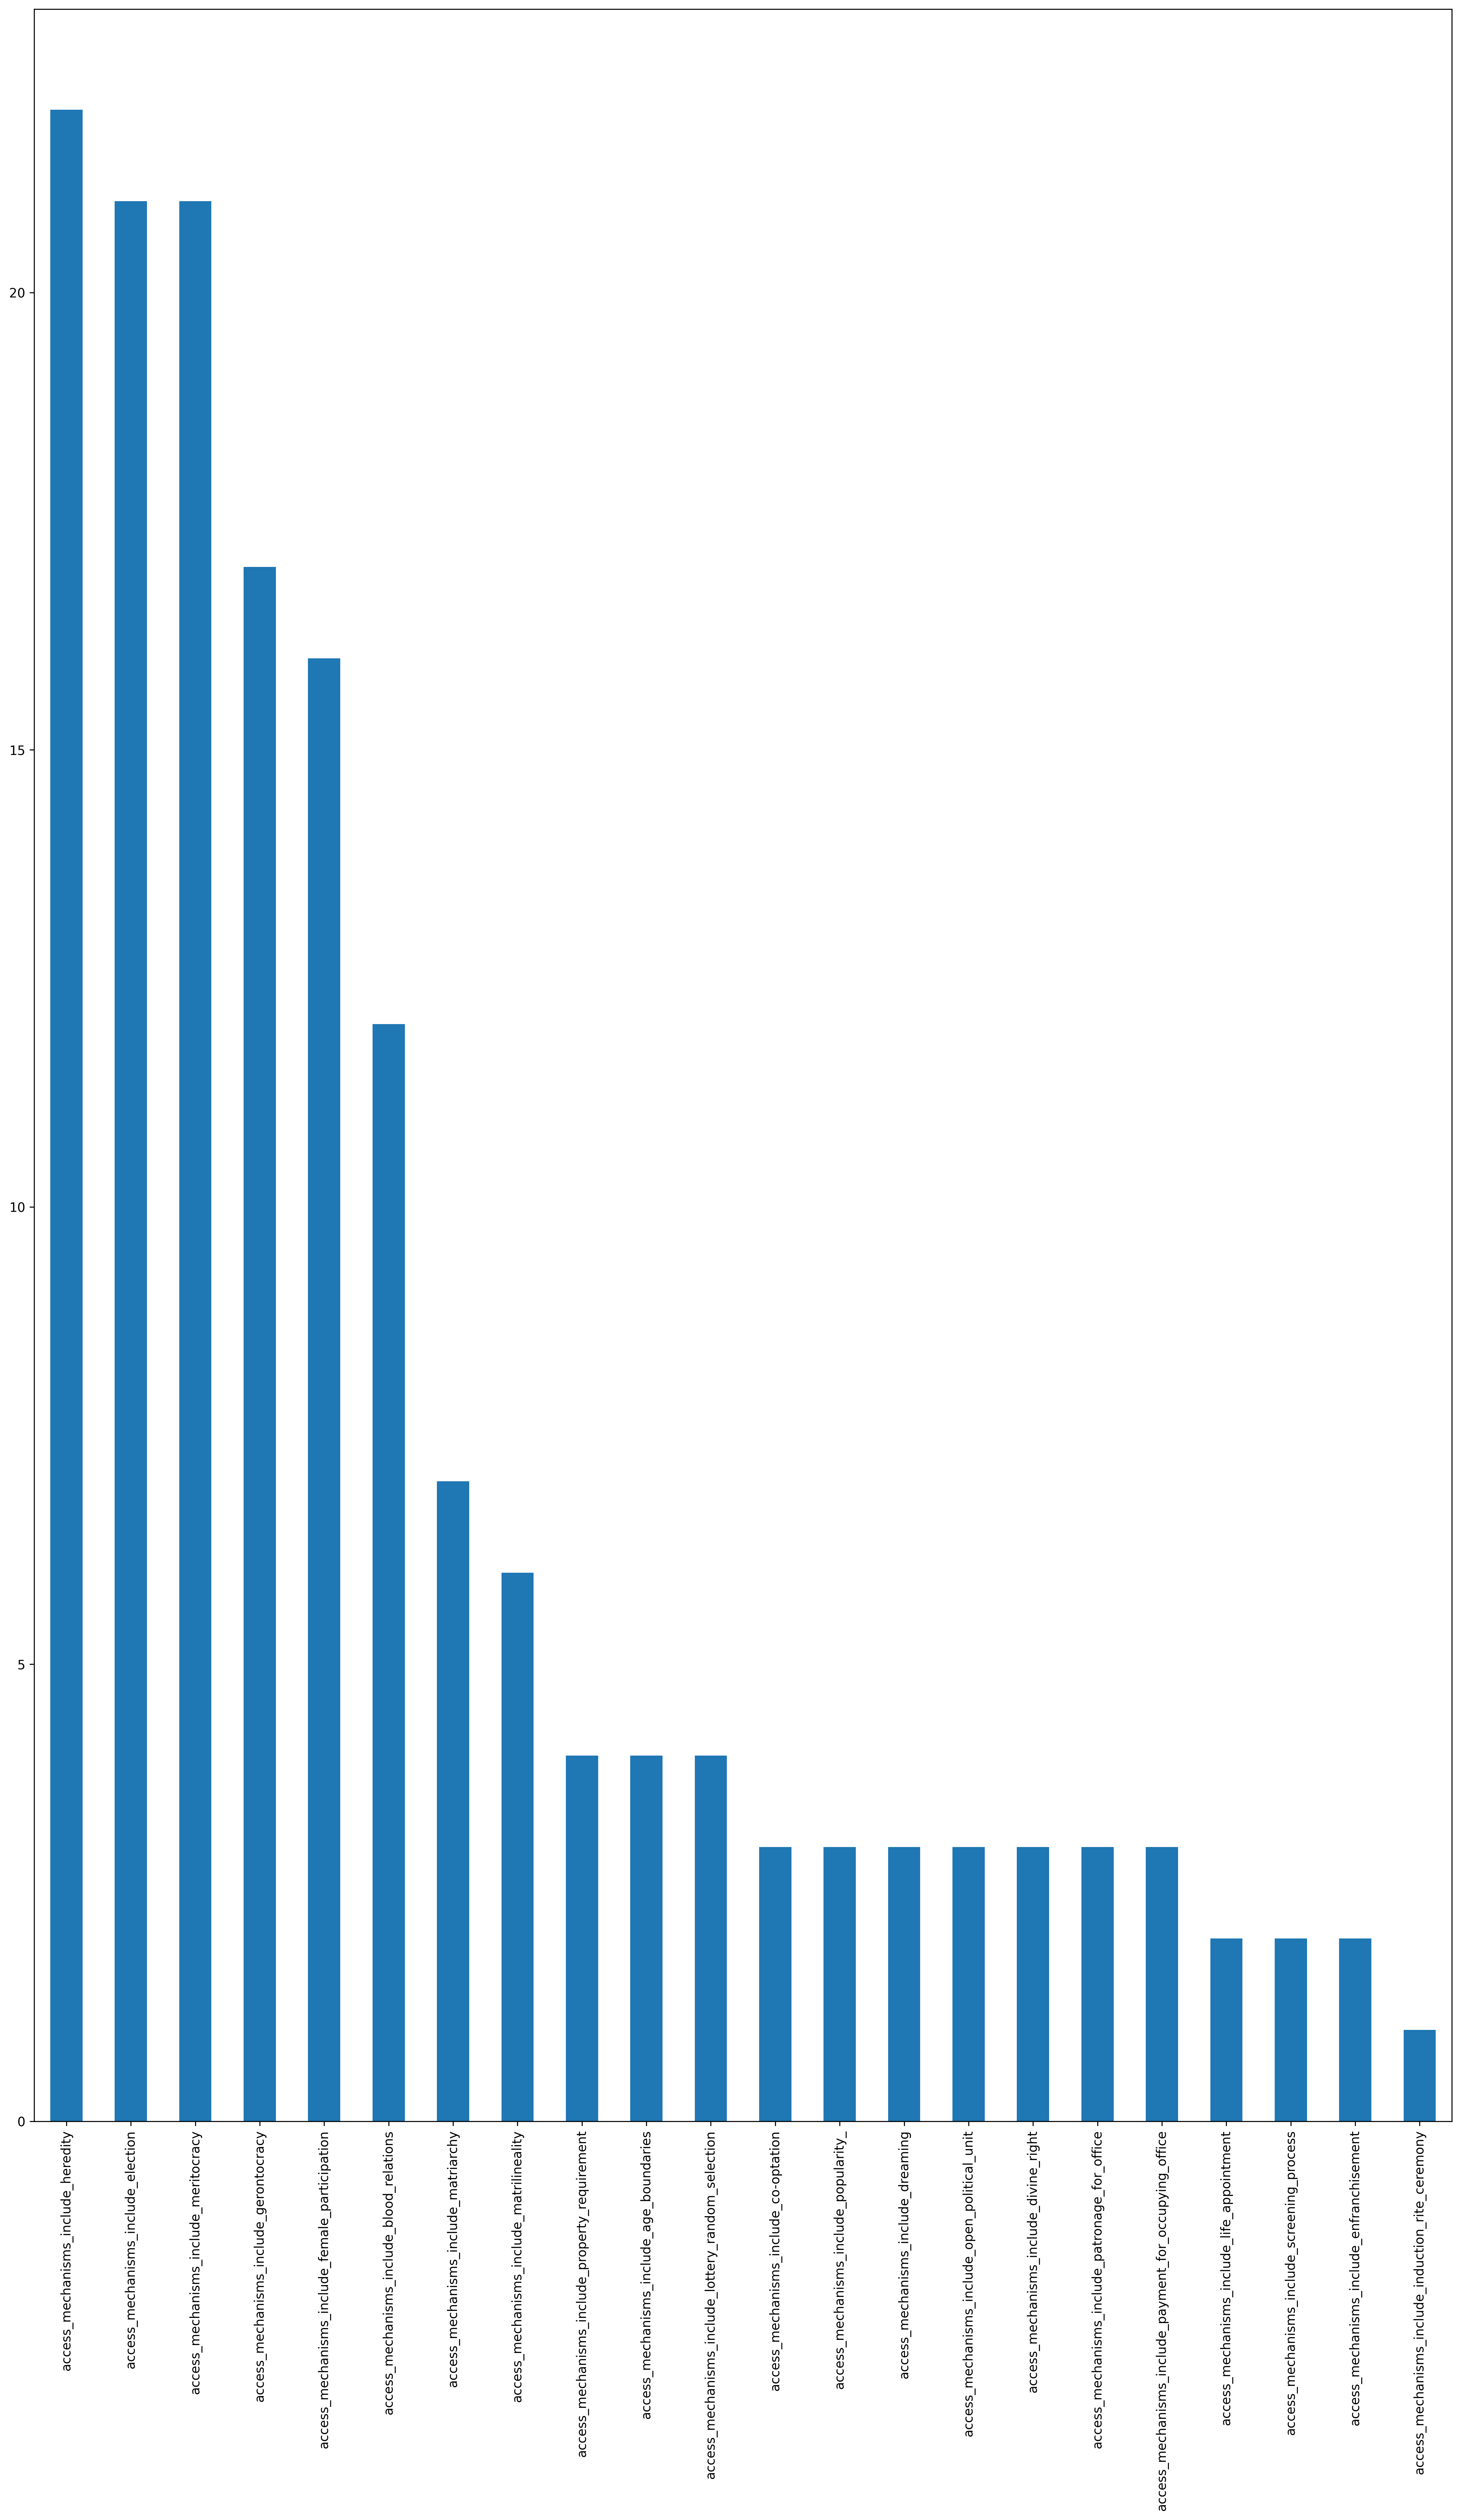

In [17]:
gov_df[access_mechanisms].sum().sort_values(ascending=False).plot(kind='bar', figsize=(20,30))

In [18]:
decision_making_mechanisms = [x for x in gov_df.columns if 'decision_making_mechanisms_' in x]

<Axes: >

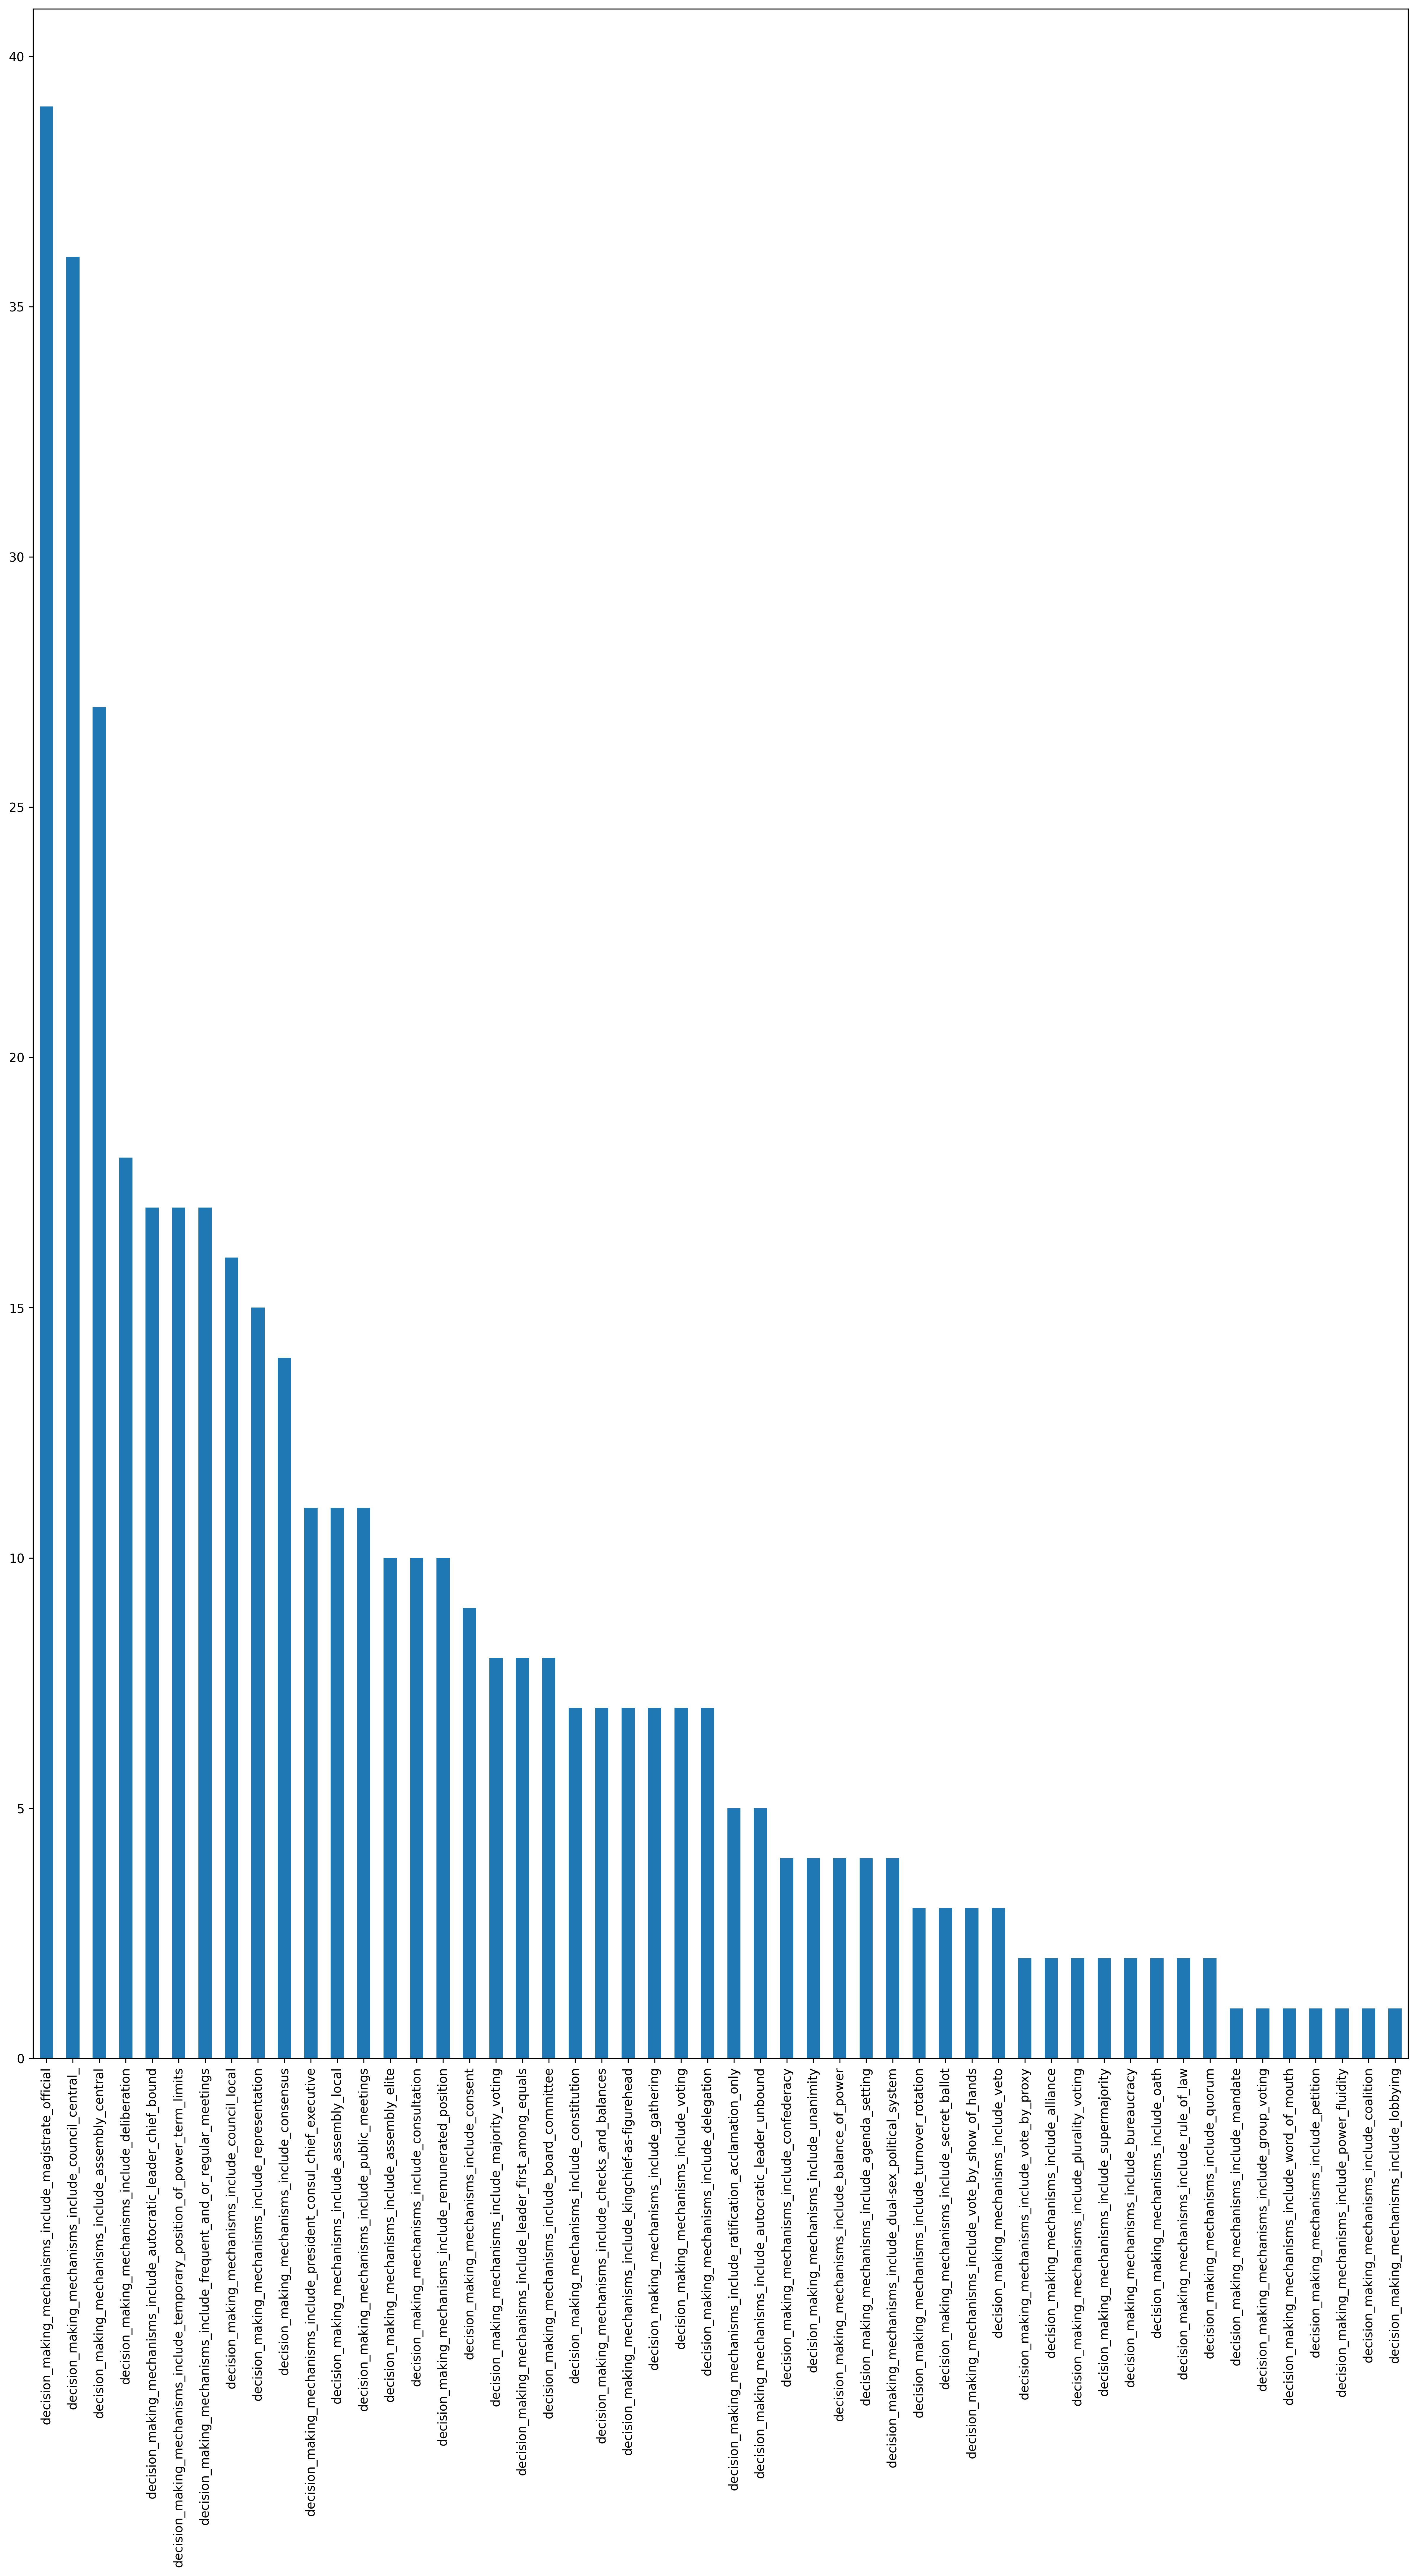

In [19]:
gov_df[decision_making_mechanisms].sum().sort_values(ascending=False).plot(kind='bar', figsize=(20,30))

In [20]:
enforcement_mechanisms = [x for x in gov_df.columns if 'enforcement_mechanisms_' in x]

<Axes: >

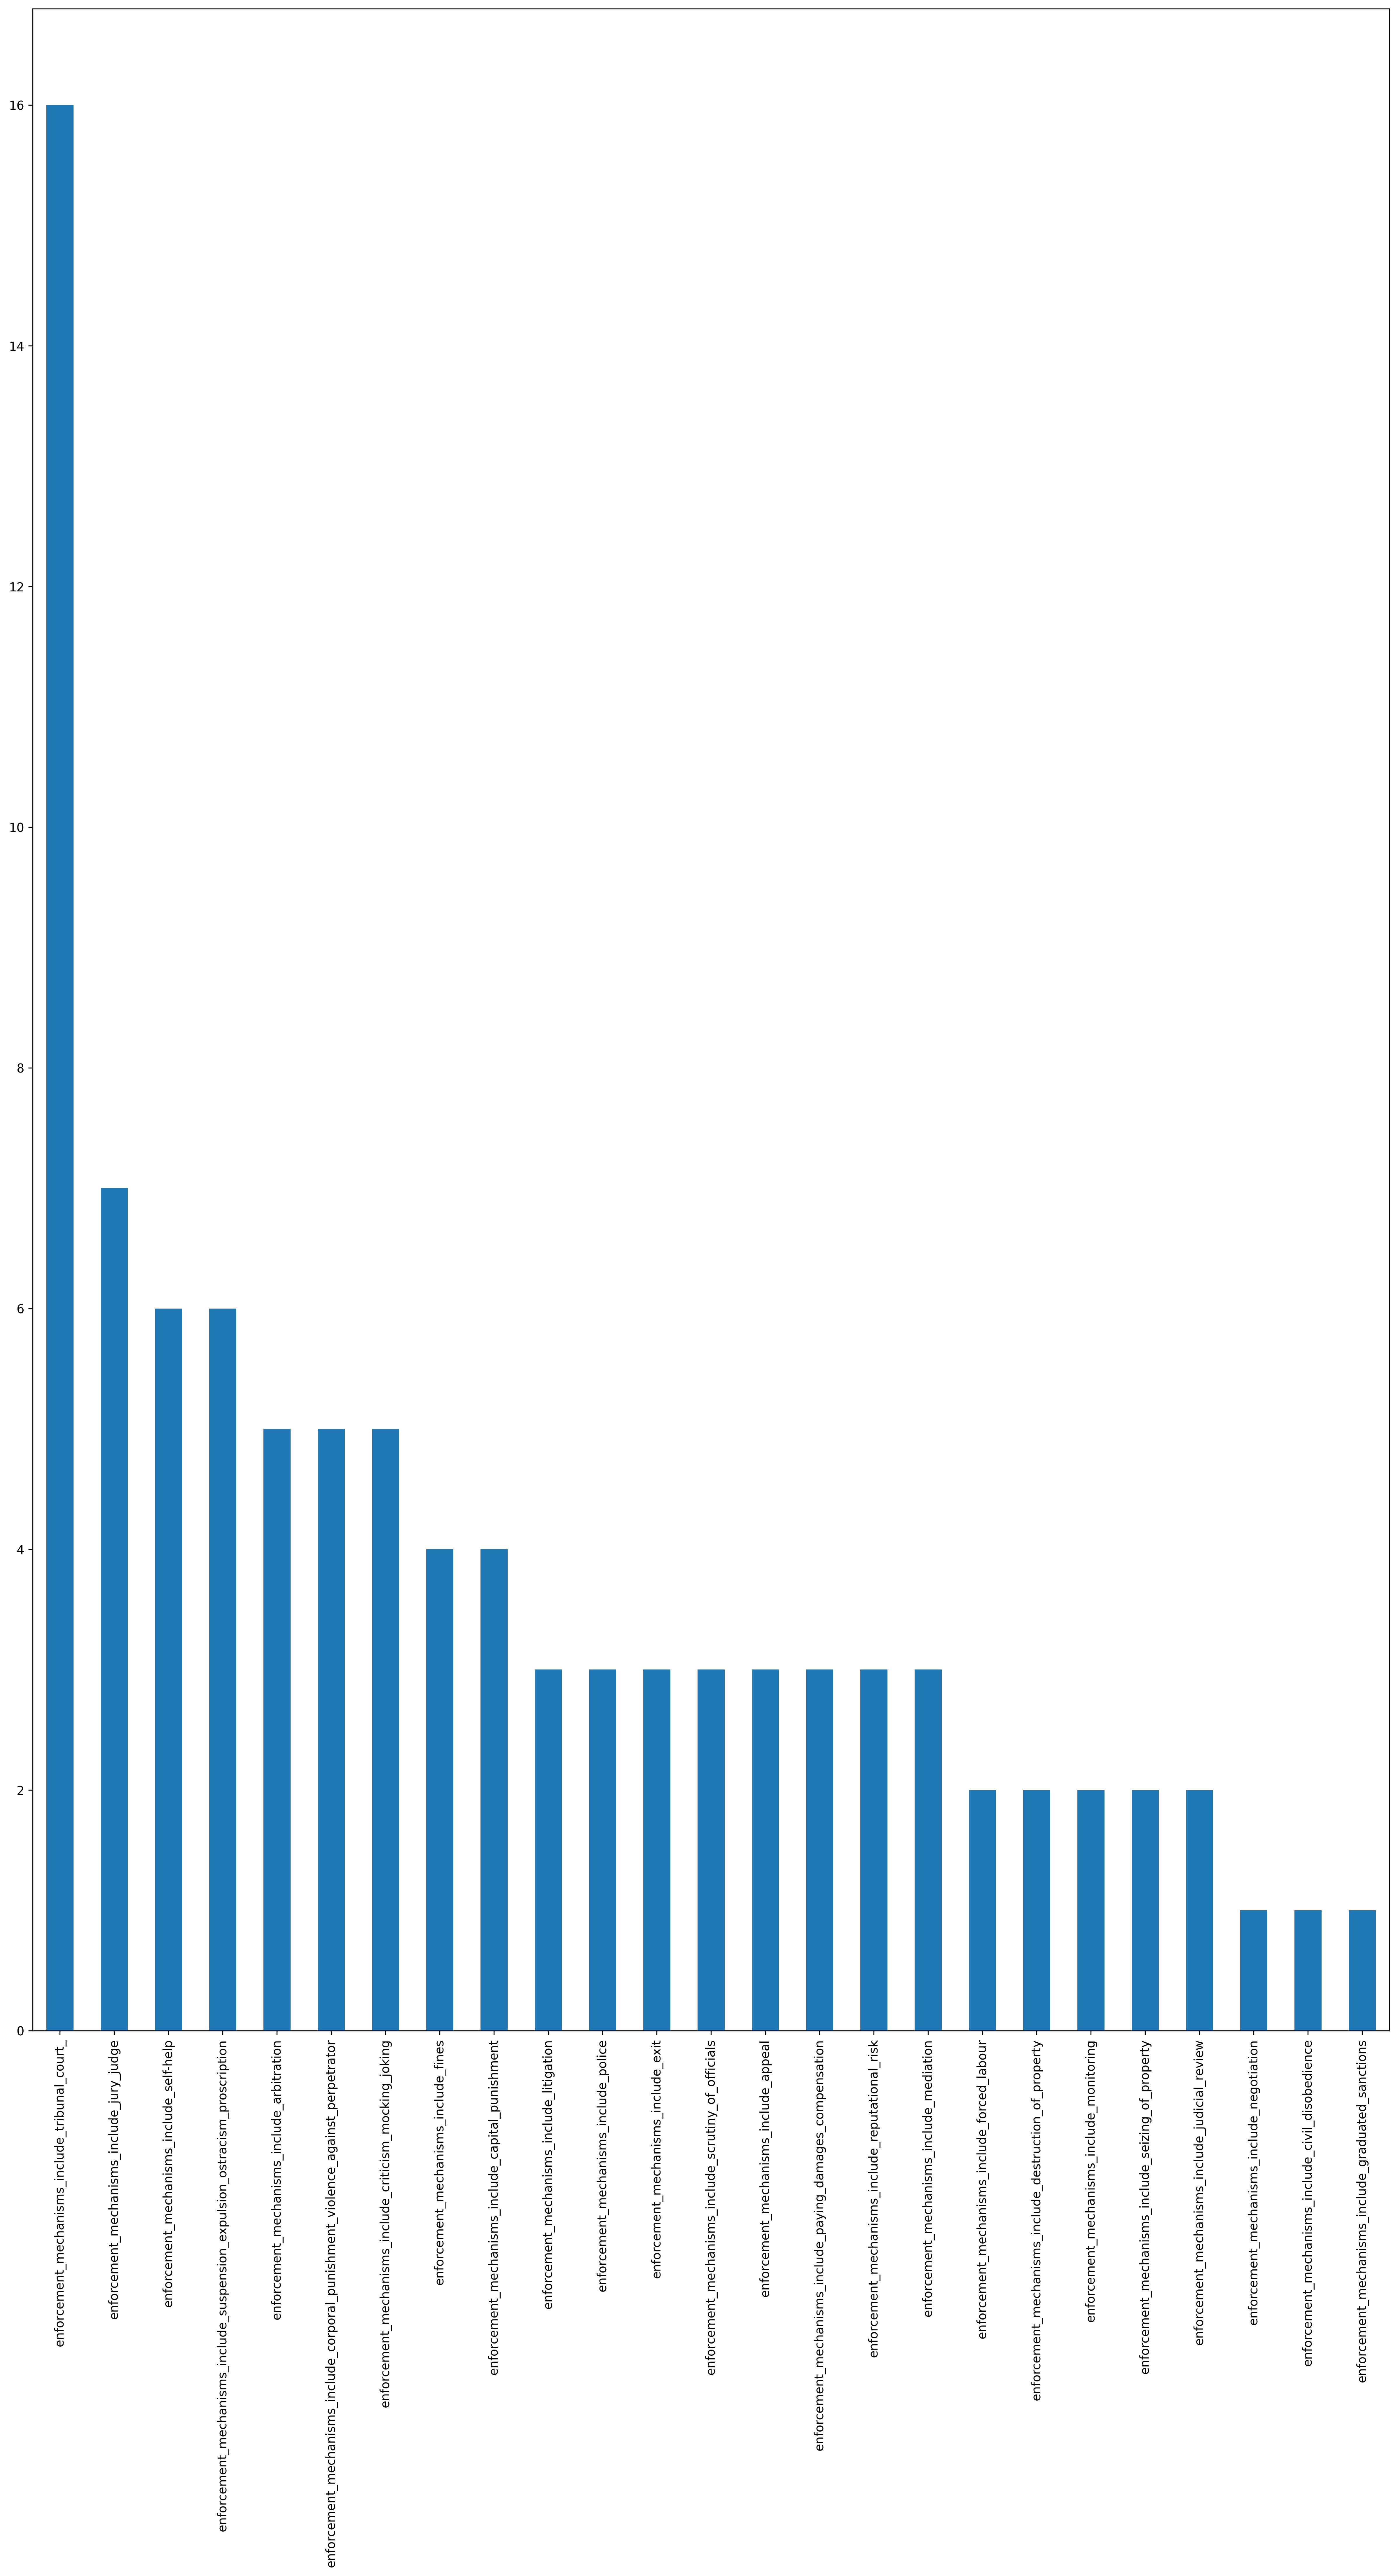

In [21]:
gov_df[enforcement_mechanisms].sum().sort_values(ascending=False).plot(kind='bar', figsize=(20,30))

### Values

In [22]:
# values_list = [x for x in gov_df.columns if x.startswith('values')]
# values_list

In [23]:
# values_df = gov_df[['Name'] + values_list]
# values_df = gov_df[values_list]

In [20]:
# values_df

In [21]:
# values_df.sum().sort_values(ascending=False)

In [22]:
# values_df.sum().sort_values(ascending=False).plot(kind='bar', figsize=(10,30))

Note:
- Mechanisms are not mutually exclusive! Many/most institutions involve multiple mechanisms.
- Values are also not mutually exclusive! Many/most institutions involve multiple values. 

### Size

In [22]:
gov_df['Size'].value_counts()

Size
10,001 - 100,000          31
1,001 - 10,000            11
100,001 - 1,000,000        8
1,000,001 - 10,000,000     6
Unknown                    5
10,000,000+                4
100 - 1,000                1
Name: count, dtype: int64

In [23]:
gov_df['Size']

0        100,001 - 1,000,000
1           10,001 - 100,000
2           10,001 - 100,000
3                    Unknown
4             1,001 - 10,000
5        100,001 - 1,000,000
6        100,001 - 1,000,000
7           10,001 - 100,000
8        100,001 - 1,000,000
9           10,001 - 100,000
10               10,000,000+
11                   Unknown
12          10,001 - 100,000
13          10,001 - 100,000
14          10,001 - 100,000
15          10,001 - 100,000
16    1,000,001 - 10,000,000
17    1,000,001 - 10,000,000
18            1,001 - 10,000
19          10,001 - 100,000
20          10,001 - 100,000
21          10,001 - 100,000
22          10,001 - 100,000
23          10,001 - 100,000
24          10,001 - 100,000
25                   Unknown
26          10,001 - 100,000
27    1,000,001 - 10,000,000
28          10,001 - 100,000
29            1,001 - 10,000
30          10,001 - 100,000
31          10,001 - 100,000
32          10,001 - 100,000
33               10,000,000+
34            

<Axes: xlabel='Size'>

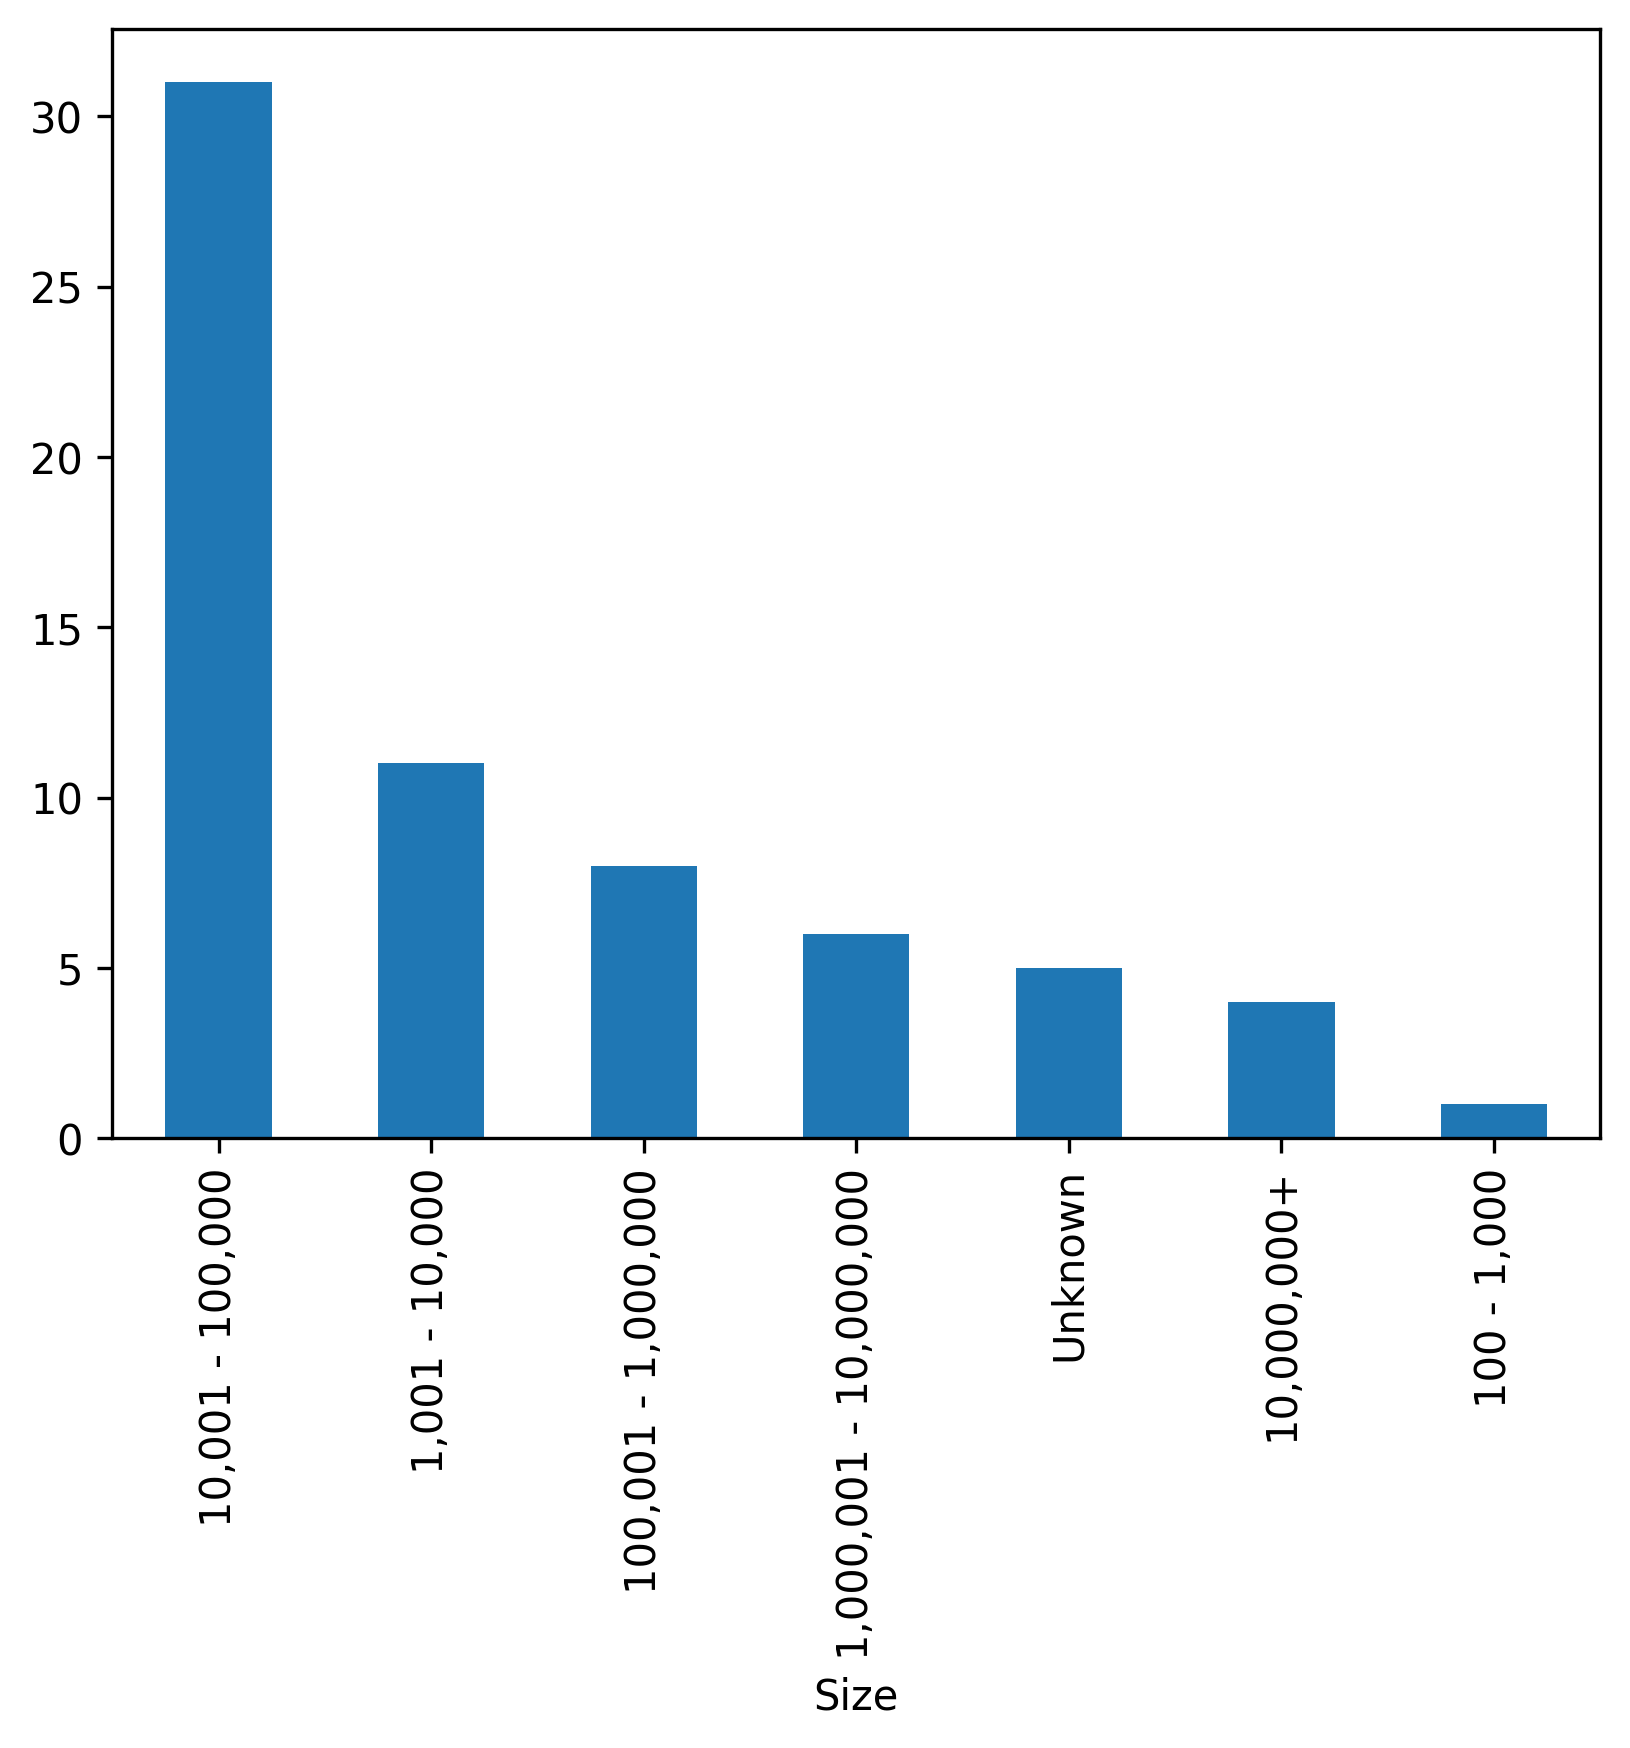

In [24]:
gov_df['Size'].value_counts().plot(kind='bar')

In [25]:
size_order = [
    '100 - 1,000',
    '1,001 - 10,000',
    '10,001 - 100,000',
    '100,001 - 1,000,000',
    '1,000,001 - 10,000,000',
    '10,000,000+',
    'Unknown'
]

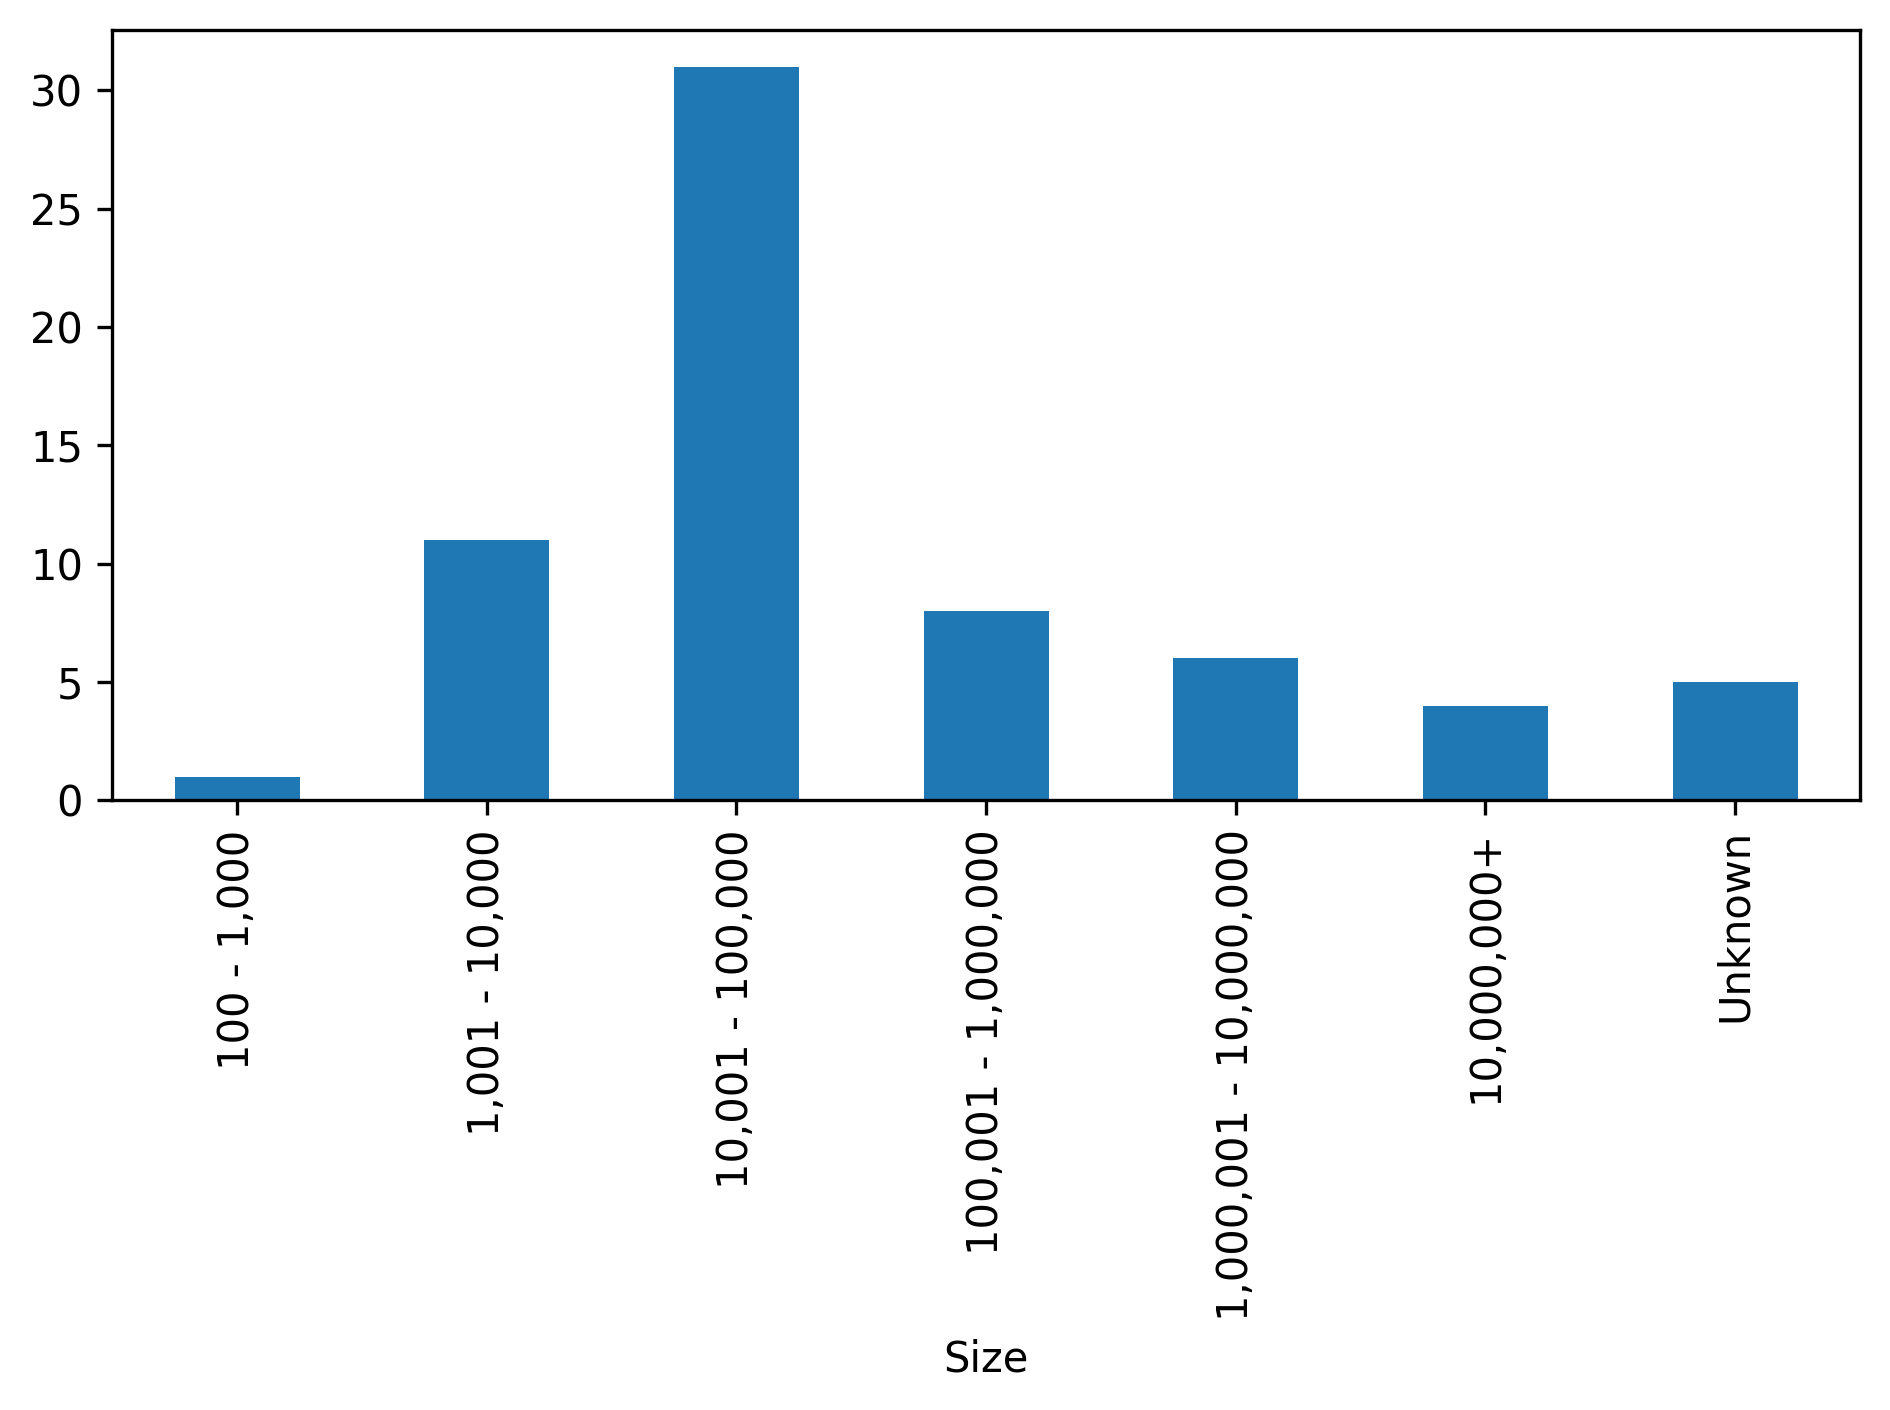

In [26]:
gov_df['Size'].value_counts().loc[size_order].plot.bar()

plt.tight_layout()
plt.savefig(fig_dir + 'communities_histogram_size.png')
plt.show()

In [27]:
gov_df['Size']

0        100,001 - 1,000,000
1           10,001 - 100,000
2           10,001 - 100,000
3                    Unknown
4             1,001 - 10,000
5        100,001 - 1,000,000
6        100,001 - 1,000,000
7           10,001 - 100,000
8        100,001 - 1,000,000
9           10,001 - 100,000
10               10,000,000+
11                   Unknown
12          10,001 - 100,000
13          10,001 - 100,000
14          10,001 - 100,000
15          10,001 - 100,000
16    1,000,001 - 10,000,000
17    1,000,001 - 10,000,000
18            1,001 - 10,000
19          10,001 - 100,000
20          10,001 - 100,000
21          10,001 - 100,000
22          10,001 - 100,000
23          10,001 - 100,000
24          10,001 - 100,000
25                   Unknown
26          10,001 - 100,000
27    1,000,001 - 10,000,000
28          10,001 - 100,000
29            1,001 - 10,000
30          10,001 - 100,000
31          10,001 - 100,000
32          10,001 - 100,000
33               10,000,000+
34            

### Geography 

In [28]:
gov_df['Geography'].value_counts()

Geography
Europe South, Italy                    7
North America                          6
Europe West                            5
Middle East                            4
Asia Southeast                         3
Asia, India (northeast)                3
Europe East                            3
Central America, Mexico                2
Central America                        2
Europe South, Greece                   2
Asia Southeast                         2
Asia, India                            1
Asia Southeast, Bali                   1
North America, Louisiana               1
South America, Brazil                  1
Asia, Southwestern China               1
Asia Central                           1
Middle East MENA                       1
Oceania                                1
Africa North, Algeria                  1
Africa South                           1
Asia, North-eastern India              1
Asia, Japan                            1
Europe North                           1
Africa

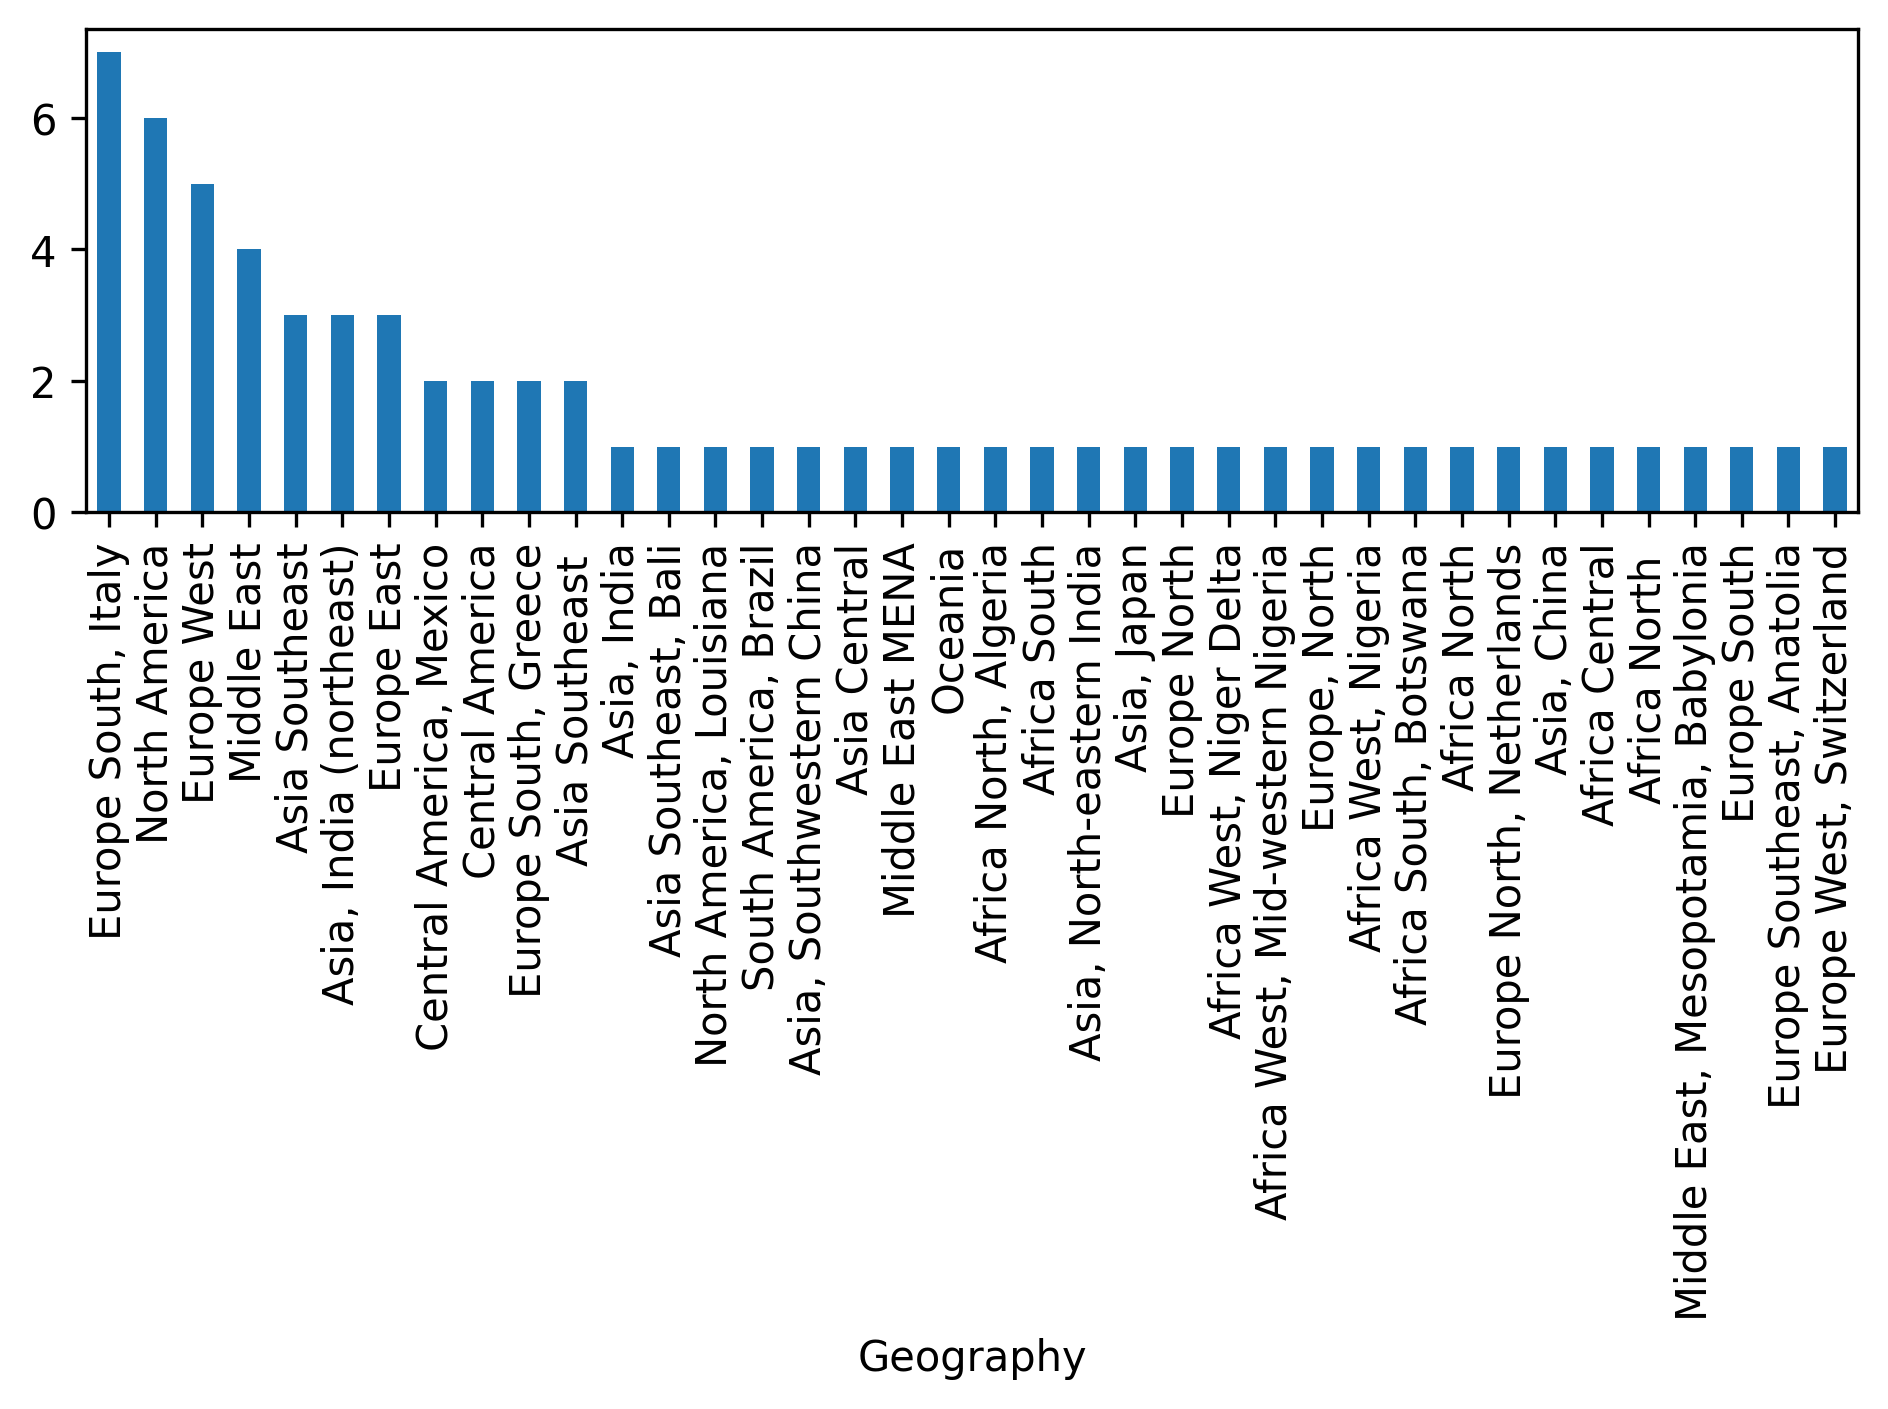

In [29]:
gov_df['Geography'].value_counts().plot(kind='bar')

plt.tight_layout()
plt.savefig(fig_dir + 'communities_histogram_geography.png')
plt.show()

In [30]:
"""
- Africa
- Europe
- Asia
- Middle East
- North America
- Central America
- South America
- Oceania
"""

'\n- Africa\n- Europe\n- Asia\n- Middle East\n- North America\n- Central America\n- South America\n- Oceania\n'

In [31]:
gov_df['Geography']

0                            Europe North
1                         Asia Southeast 
2                             Europe West
3                             Middle East
4              Europe Southeast, Anatolia
5                            Europe South
6                 Central America, Mexico
7     Middle East, Mesopotamia, Babylonia
8                           Africa North 
9                          Africa Central
10                            Asia, China
11                            Europe East
12                            Europe West
13                            Europe West
14              Europe North, Netherlands
15                            Middle East
16                           Africa North
17                            Europe West
18                 Africa South, Botswana
19                    Europe South, Italy
20                    Europe South, Italy
21                   Europe South, Greece
22                   Europe South, Greece
23                          North 

### Geography 

In [32]:
gov_df.head()

Name                                       Institutions  \
0  Aedui (Celtic Oppida)             Senatus,Elected magistrates,Assemblies   
1                   Akha  Council of Elders,Village Founder-Leader (dzom...   
2                 Amalfi  Prefetturii/ Conti/ Dogi,Sedile di congrega,Ta...   
3            Arab nomads                 shaykh or sayyid,shura or mashwara   
4                  Assur                  King,Alum,Limmum,Scribe,City hall   

                                           Mechanism  \
0  Election,Council (central) ,Assembly (central)...   
1  Leader (first among equals),Gerontocracy,Blood...   
2  Election,Magistrate/official,Heredity,Constitu...   
3  Consensus,Consultation,Autocratic Leader/Chief...   
4  President/Consul/Chief Executive,Assembly (cen...   

                                               Notes  \
0  There are many Celtic oppida throughout northe...   
1                               see Institutions tab   
2  Camera, M, p. 29 ("La sua popolazione che nel ...   
3  Nomadic Bedouin society governed by rulers sel...   
4  Independent city-state. Constitutional monarch...   

                                           Time span  \
0                                 2nd-1st century BC   
1                             20th century - Present   
2                                4th-12th century AD   
3  1st-7th century AD\n(start date is arbitrary, ...   
4                    19th century BC\n(1920-1800 BC)   

                    Geography                 Size  \
0                Europe North  100,001 - 1,000,000   
1             Asia Southeast      10,001 - 100,000   
2                 Europe West     10,001 - 100,000   
3                 Middle East              Unknown   
4  Europe Southeast, Anatolia       1,001 - 10,000   

                                              Source Metanotes  \
0  Collis, “Celtic” Oppida, in Hansen, A Comparat...       NaN   
1  Main: \nKammerer, Cornelia Ann (1985/86), Gate...       NaN   
2  Camera, M. Istoria della città e costiera di A...       NaN   
3  Stasavage, David (2020), The Decline and Rise ...       NaN   
4  Larsen, M. T. The Old Assyrian City-State in H...       NaN   

                                      Heterogeneity   \
0                                                NaN   
1  Informal inclusion,Gender groups,Informal powe...   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                         FC comments     expert check  \
0                                    Edited March 23              NaN   
1                                      Edited May 23              NaN   
2      Edited March 23 (could use more info on CGIs)              NaN   
3  Edited Feb 23 (could use additional sources fo...              NaN   
4                                      Edited Mar 23  Giacomo CHECKED   

   Time span: Start  Time span: End  \
0              -200               0   
1              1900            2023   
2               300            1200   
3                 0             700   
4             -1920           -1800   

   enforcement_mechanisms_include_graduated_sanctions  \
0                                                  0    
1                                                  0    
2                                                  0    
3                                                  0    
4                                                  0    

   access_mechanisms_include_dreaming  \
0                                   0   
1                                   1   
2                                   0   
3                                   0   
4                                   0   

   decision_making_mechanisms_include_oath  \
0                                        0   
1                                        0   
2                                        0   
3                          

In [33]:
gov_df['Region'].value_counts()

Region
Europe             23
Asia               15
Africa              9
North America       7
Middle East         6
Central America     4
South America       1
Oceania             1
Name: count, dtype: int64

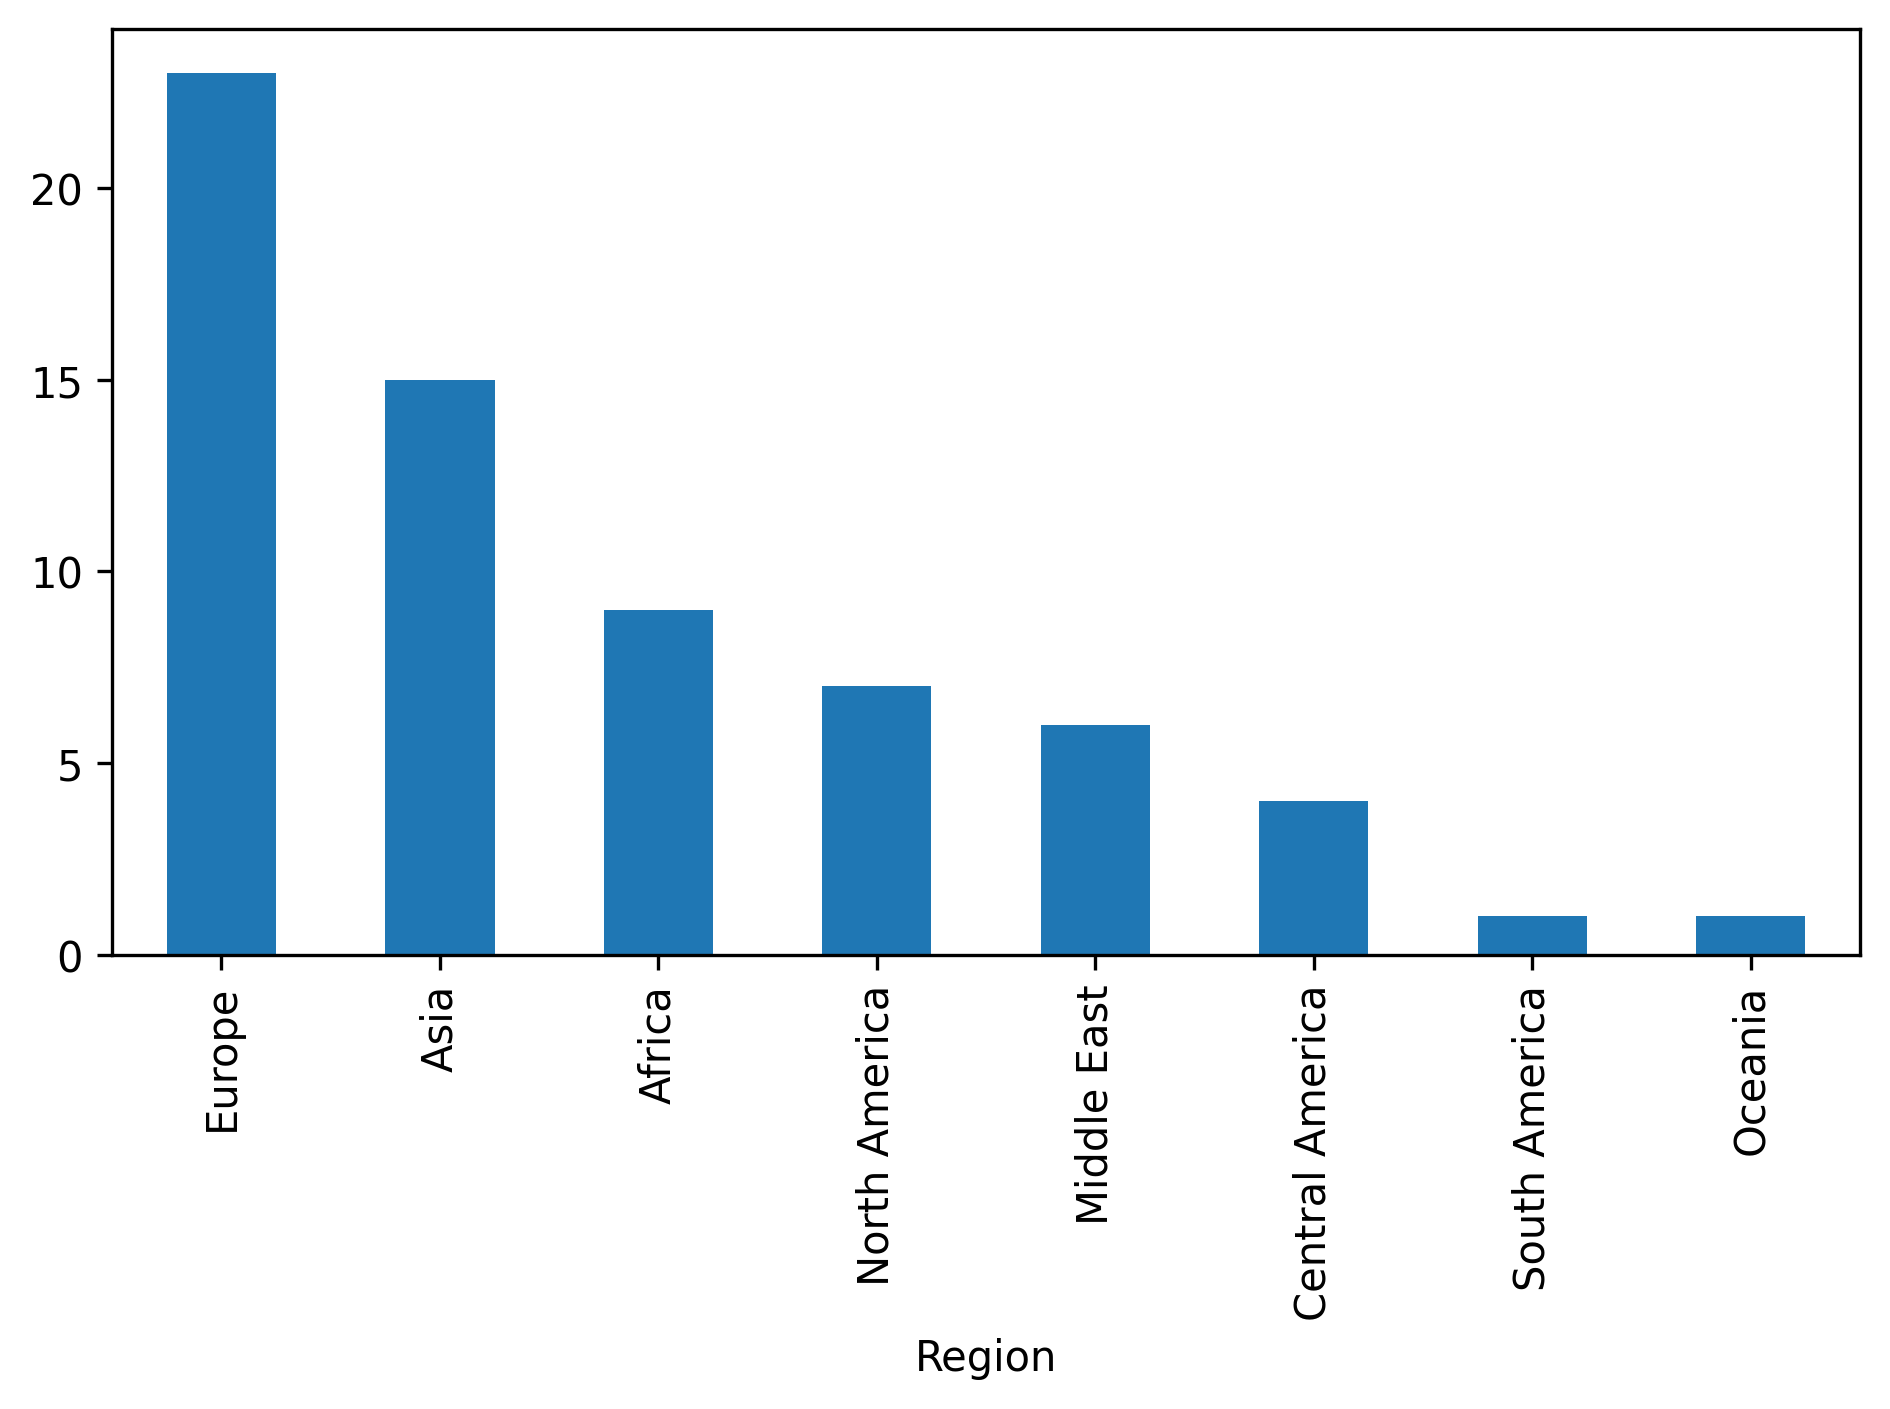

In [34]:
gov_df['Region'].value_counts().plot(kind='bar')

plt.tight_layout()
plt.savefig(fig_dir + 'communities_histogram_region.png')
plt.show()

Notes:
- Overrepresentation of European communities
- Need more representation of Oceania and Pacific Islanders, South America, Central America! 

## Mapping geographies


### Prep world map data to match the regions we have 

In [35]:
worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

/var/folders/v7/8x_7ty4j3m76hgg7tncks_kc0000gn/T/ipykernel_13232/3744710904.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


In [36]:
worldmap

pop_est                continent                      name iso_a3  \
0    8.899530e+05                  Oceania                      Fiji    FJI   
1    5.800546e+07                   Africa                  Tanzania    TZA   
2    6.032530e+05                   Africa                 W. Sahara    ESH   
3    3.758926e+07            North America                    Canada    CAN   
4    3.282395e+08            North America  United States of America    USA   
5    1.851393e+07                     Asia                Kazakhstan    KAZ   
6    3.358065e+07                     Asia                Uzbekistan    UZB   
7    8.776109e+06                  Oceania          Papua New Guinea    PNG   
8    2.706256e+08                     Asia                 Indonesia    IDN   
9    4.493871e+07            South America                 Argentina    ARG   
10   1.895204e+07            South America                     Chile    CHL   
11   8.679057e+07                   Africa           Dem. Rep. Congo    COD   
12   1.019232e+07                   Africa                   Somalia    SOM   
13   5.257397e+07                   Africa                     Kenya    KEN   
14   4.281324e+07                   Africa                     Sudan    SDN   
15   1.594688e+07                   Africa                      Chad    TCD   
16   1.126308e+07            North America                     Haiti    HTI   
17   1.073896e+07            North America            Dominican Rep.    DOM   
18   1.443735e+08                   Europe                    Russia    RUS   
19   3.894820e+05            North America                   Bahamas    BHS   
20   3.398000e+03            South America              Falkland Is.    FLK   
21   5.347896e+06                   Europe                    Norway    NOR   
22   5.622500e+04            North America                 Greenland    GRL   
23   1.400000e+02  Seven seas (open ocean)    Fr. S. Antarctic Lands    ATF   
24   1.293119e+06                     Asia               Timor-Leste    TLS   
25   5.855827e+07                   Africa              South Africa    ZAF   
26   2.125268e+06                   Africa                   Lesotho    LSO   
27   1.275755e+08            North America                    Mexico    MEX   
28   3.461734e+06            South America                   Uruguay    URY   
29   2.110495e+08            South America                    Brazil    BRA   
30   1.151310e+07            South America                   Bolivia    BOL   
31   3.251045e+07            South America                      Peru    PER   
32   5.033944e+07            South America                  Colombia    COL   
33   4.246439e+06            North America                    Panama    PAN   
34   5.047561e+06            North America                Costa Rica    CRI   
35   6.545502e+06            North America                 Nicaragua    NIC   
36   9.746117e+06            North America                  Honduras    HND   
37   6.453553e+06            North America               El Salvador    SLV   
38   1.660403e+07            North America                 Guatemala    GTM   
39   3.903530e+05            North America                    Belize    BLZ   
40   2.851583e+07            South America                 Venezuela    VEN   
41   7.827660e+05            South America                    Guyana    GUY   
42   5.813630e+05            South America                  Suriname    SUR   
43   6.705989e+07                   Europe                    France    FRA   
44   1.737366e+07            South America                   Ecuador    ECU   
45   3.193694e+06            North America               Puerto Rico    PRI   
46   2.948279e+06            North America                   Jamaica    JAM   
47   1.133348e+07            North America                      Cuba    CUB   
48   1.464547e+07                   Africa                  Zimbabwe    ZWE   
49   2.303697e+06                   Africa                  

In [37]:
sorted(list(worldmap['name']))

['Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Antarctica',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bangladesh',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herz.',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Rep.',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Congo',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 "Côte d'Ivoire",
 'Dem. Rep. Congo',
 'Denmark',
 'Djibouti',
 'Dominican Rep.',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Eq. Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Falkland Is.',
 'Fiji',
 'Finland',
 'Fr. S. Antarctic Lands',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Greenland',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Honduras',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Ireland',
 'Israel',
 'Italy

In [38]:
central_america_countries = [
    'Belize',
    'Costa Rica',
    'El Salvador',
    'Guatemala',
    'Honduras',
    'Nicaragua',
    'Panama'
]

In [39]:
middle_east_countries = [
    'Cyprus',
    'Egypt',
    'Iran',
    'Iraq',
    'Israel',
    'Jordan',
    'Kuwait',
    'Lebanon',
    'Oman',
    'Palestine',
    'Qatar',
    'Saudi Arabia',
    'Syria',
    'Turkey',
    'United Arab Emirates',
    'Yemen'
]

In [40]:
worldmap['name'].isin(central_america_countries)

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
30     False
31     False
32     False
33      True
34      True
35      True
36      True
37      True
38      True
39      True
40     False
41     False
42     False
43     False
44     False
45     False
46     False
47     False
48     False
49     False
50     False
51     False
52     False
53     False
54     False
55     False
56     False
57     False
58     False
59     False
60     False
61     False
62     False
63     False
64     False
65     False
66     False
67     False
68     False
69     False
70     False
71     False
72     False
73     False
74     False
75     False
76     False

In [41]:
# Add region for Central America
worldmap.loc[(worldmap['name'].isin(central_america_countries)), 'continent'] = 'Central America'

In [42]:
worldmap.loc[(worldmap['continent'] == 'Central America')]

pop_est        continent         name iso_a3  gdp_md_est  \
33   4246439.0  Central America       Panama    PAN       66800   
34   5047561.0  Central America   Costa Rica    CRI       61801   
35   6545502.0  Central America    Nicaragua    NIC       12520   
36   9746117.0  Central America     Honduras    HND       25095   
37   6453553.0  Central America  El Salvador    SLV       27022   
38  16604026.0  Central America    Guatemala    GTM       76710   
39    390353.0  Central America       Belize    BLZ        1879   

                                             geometry  
33  POLYGON ((-77.35336 8.67050, -77.47472 8.52429...  
34  POLYGON ((-82.54620 9.56613, -82.93289 9.47681...  
35  POLYGON ((-83.65561 10.93876, -83.89505 10.726...  
36  POLYGON ((-83.14722 14.99583, -83.48999 15.016...  
37  POLYGON ((-89.35333 14.42413, -89.05851 14.340...  
38  POLYGON ((-92.22775 14.53883, -92.20323 14.830...  
39  POLYGON ((-89.14308 17.80832, -89.15091 17.955...

In [43]:
# Add region for Middle East
worldmap.loc[(worldmap['name'].isin(middle_east_countries)), 'continent'] = 'Middle East'

In [44]:
worldmap.loc[(worldmap['continent'] == 'Middle East')]

pop_est    continent                  name iso_a3  gdp_md_est  \
76     9053300.0  Middle East                Israel    ISR      394652   
77     6855713.0  Middle East               Lebanon    LBN       51991   
79     4685306.0  Middle East             Palestine    PSE       16276   
83    10101694.0  Middle East                Jordan    JOR       44502   
84     9770529.0  Middle East  United Arab Emirates    ARE      421142   
85     2832067.0  Middle East                 Qatar    QAT      175837   
86     4207083.0  Middle East                Kuwait    KWT      134628   
87    39309783.0  Middle East                  Iraq    IRQ      234094   
88     4974986.0  Middle East                  Oman    OMN       76331   
107   82913906.0  Middle East                  Iran    IRN      453996   
108   17070135.0  Middle East                 Syria    SYR       98830   
124   83429615.0  Middle East                Turkey    TUR      761425   
157   29161922.0  Middle East                 Yemen    YEM       22581   
158   34268528.0  Middle East          Saudi Arabia    SAU      792966   
161    1198575.0  Middle East                Cyprus    CYP       24948   
163  100388073.0  Middle East                 Egypt    EGY      303092   

                                              geometry  
76   POLYGON ((35.71992 32.70919, 35.54567 32.39399...  
77   POLYGON ((35.82110 33.27743, 35.55280 33.26427...  
79   POLYGON ((35.39756 31.48909, 34.92741 31.35344...  
83   POLYGON ((35.54567 32.39399, 35.71992 32.70919...  
84   POLYGON ((51.57952 24.24550, 51.75744 24.29407...  
85   POLYGON ((50.81011 24.75474, 50.74391 25.48242...  
86   POLYGON ((47.97452 29.97582, 48.18319 29.53448...  
87   POLYGON ((39.19547 32.16101, 38.79234 33.37869...  
88   MULTIPOLYGON (((55.20834 22.70833, 55.23449 23...  
107  POLYGON ((48.56797 29.92678, 48.01457 30.45246...  
108  POLYGON ((35.71992 32.70919, 35.70080 32.71601...  
124  MULTIPOLYGON (((44.77268 37.17044, 44.29345 37...  
157  POLYGON ((52.00001 19.00000, 52.78218 17.34974...  
158  POLYGON ((34.95604 29.35655, 36.06894 29.19749...  
161  POLYGON ((32.73178 35.14003, 32.91957 35.08783...  
163  POLYGON ((36.86623 22.00000, 32.90000 22.00000...

In [45]:
worldmap['continent'].value_counts()

continent
Africa                     50
Europe                     39
Asia                       32
Middle East                16
South America              13
North America              11
Oceania                     7
Central America             7
Seven seas (open ocean)     1
Antarctica                  1
Name: count, dtype: int64

#### Merge regions on world map

In [46]:
region_map = gpd.GeoDataFrame(columns=['Region', 'geometry'])

In [47]:
region_map

Empty GeoDataFrame
Columns: [Region, geometry]
Index: []

In [48]:
worldmap.head()

pop_est      continent                      name iso_a3  gdp_md_est  \
0     889953.0        Oceania                      Fiji    FJI        5496   
1   58005463.0         Africa                  Tanzania    TZA       63177   
2     603253.0         Africa                 W. Sahara    ESH         907   
3   37589262.0  North America                    Canada    CAN     1736425   
4  328239523.0  North America  United States of America    USA    21433226   

                                            geometry  
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...

In [49]:
test_map = worldmap.loc[(worldmap['continent'] == 'Central America')].unary_union

In [50]:
print(test_map)

POLYGON ((-77.24256649444008 7.935278225125444, -77.43110795765699 7.638061224798734, -77.7534138658614 7.709839789252143, -77.88157141794525 7.223771267114785, -78.21493608266012 7.512254950384161, -78.42916073272607 8.052041123888927, -78.18209570993864 8.319182440621773, -78.4354652574657 8.38770538984079, -78.62212053090394 8.718124497915028, -79.12030717641375 8.996092027213024, -79.55787736684519 8.932374986197146, -79.76057817251005 8.5845150822244, -80.16448116730334 8.333315944853595, -80.38265906443962 8.298408514840432, -80.4806892564973 8.09030752200107, -80.00368994822716 7.547524115423372, -80.276670701809 7.419754136581716, -80.42115800649708 7.271571966984765, -80.8864009264208 7.220541490096537, -81.05954281281473 7.817921047390597, -81.18971574575795 7.64790558515034, -81.51951473664468 7.706610012233909, -81.72131120474447 8.108962714058435, -82.13144120962892 8.175392767769637, -82.39093441438257 8.29236237226229, -82.82008134635042 8.290863755725823, -82.8509580146

In [51]:
regions_list = list(gov_df['Region'].unique())

In [52]:
regions_list

['Europe',
 'Asia',
 'Middle East',
 'Central America',
 'Africa',
 'North America',
 'South America',
 'Oceania']

In [53]:
region_map['Region'] = regions_list

In [54]:
region_map

Region geometry
0           Europe     None
1             Asia     None
2      Middle East     None
3  Central America     None
4           Africa     None
5    North America     None
6    South America     None
7          Oceania     None

In [55]:
worldmap['continent'].value_counts()

continent
Africa                     50
Europe                     39
Asia                       32
Middle East                16
South America              13
North America              11
Oceania                     7
Central America             7
Seven seas (open ocean)     1
Antarctica                  1
Name: count, dtype: int64

In [56]:
region_map['geometry'].loc[region_map['Region'] == 'Africa'] = worldmap.loc[(worldmap['continent'] == 'Africa')].unary_union

In [57]:
region_map['geometry'].loc[region_map['Region'] == 'Europe'] = worldmap.loc[(worldmap['continent'] == 'Europe')].unary_union

In [58]:
region_map['geometry'].loc[region_map['Region'] == 'Asia'] = worldmap.loc[(worldmap['continent'] == 'Asia')].unary_union

In [59]:
region_map['geometry'].loc[region_map['Region'] == 'Middle East'] = worldmap.loc[(worldmap['continent'] == 'Middle East')].unary_union

In [60]:
region_map['geometry'].loc[region_map['Region'] == 'North America'] = worldmap.loc[(worldmap['continent'] == 'North America')].unary_union

In [61]:
region_map['geometry'].loc[region_map['Region'] == 'Central America'] = worldmap.loc[(worldmap['continent'] == 'Central America')].unary_union

In [62]:
region_map['geometry'].loc[region_map['Region'] == 'South America'] = worldmap.loc[(worldmap['continent'] == 'South America')].unary_union

In [63]:
region_map['geometry'].loc[region_map['Region'] == 'Oceania'] = worldmap.loc[(worldmap['continent'] == 'Oceania')].unary_union

In [64]:
region_map

Region                                           geometry
0           Europe  MULTIPOLYGON (((-53.555 2.335, -53.779 2.377, ...
1             Asia  MULTIPOLYGON (((105.857 -4.306, 105.818 -5.852...
2      Middle East  MULTIPOLYGON (((25.000 25.682, 25.000 29.239, ...
3  Central America  POLYGON ((-77.243 7.935, -77.431 7.638, -77.75...
4           Africa  MULTIPOLYGON (((-11.439 6.786, -11.708 6.860, ...
5    North America  MULTIPOLYGON (((-155.222 19.240, -155.542 19.0...
6    South America  MULTIPOLYGON (((-68.640 -55.580, -69.232 -55.4...
7          Oceania  MULTIPOLYGON (((147.914 -43.212, 147.565 -42.9...

In [65]:
region_counts = gov_df['Region'].value_counts().rename_axis('Region').reset_index(name='Count')

In [66]:
region_counts

Region  Count
0           Europe     23
1             Asia     15
2           Africa      9
3    North America      7
4      Middle East      6
5  Central America      4
6    South America      1
7          Oceania      1

In [67]:
merged_regions = pd.merge(region_map, region_counts, on='Region')

In [68]:
merged_regions

Region                                           geometry  Count
0           Europe  MULTIPOLYGON (((-53.555 2.335, -53.779 2.377, ...     23
1             Asia  MULTIPOLYGON (((105.857 -4.306, 105.818 -5.852...     15
2      Middle East  MULTIPOLYGON (((25.000 25.682, 25.000 29.239, ...      6
3  Central America  POLYGON ((-77.243 7.935, -77.431 7.638, -77.75...      4
4           Africa  MULTIPOLYGON (((-11.439 6.786, -11.708 6.860, ...      9
5    North America  MULTIPOLYGON (((-155.222 19.240, -155.542 19.0...      7
6    South America  MULTIPOLYGON (((-68.640 -55.580, -69.232 -55.4...      1
7          Oceania  MULTIPOLYGON (((147.914 -43.212, 147.565 -42.9...      1

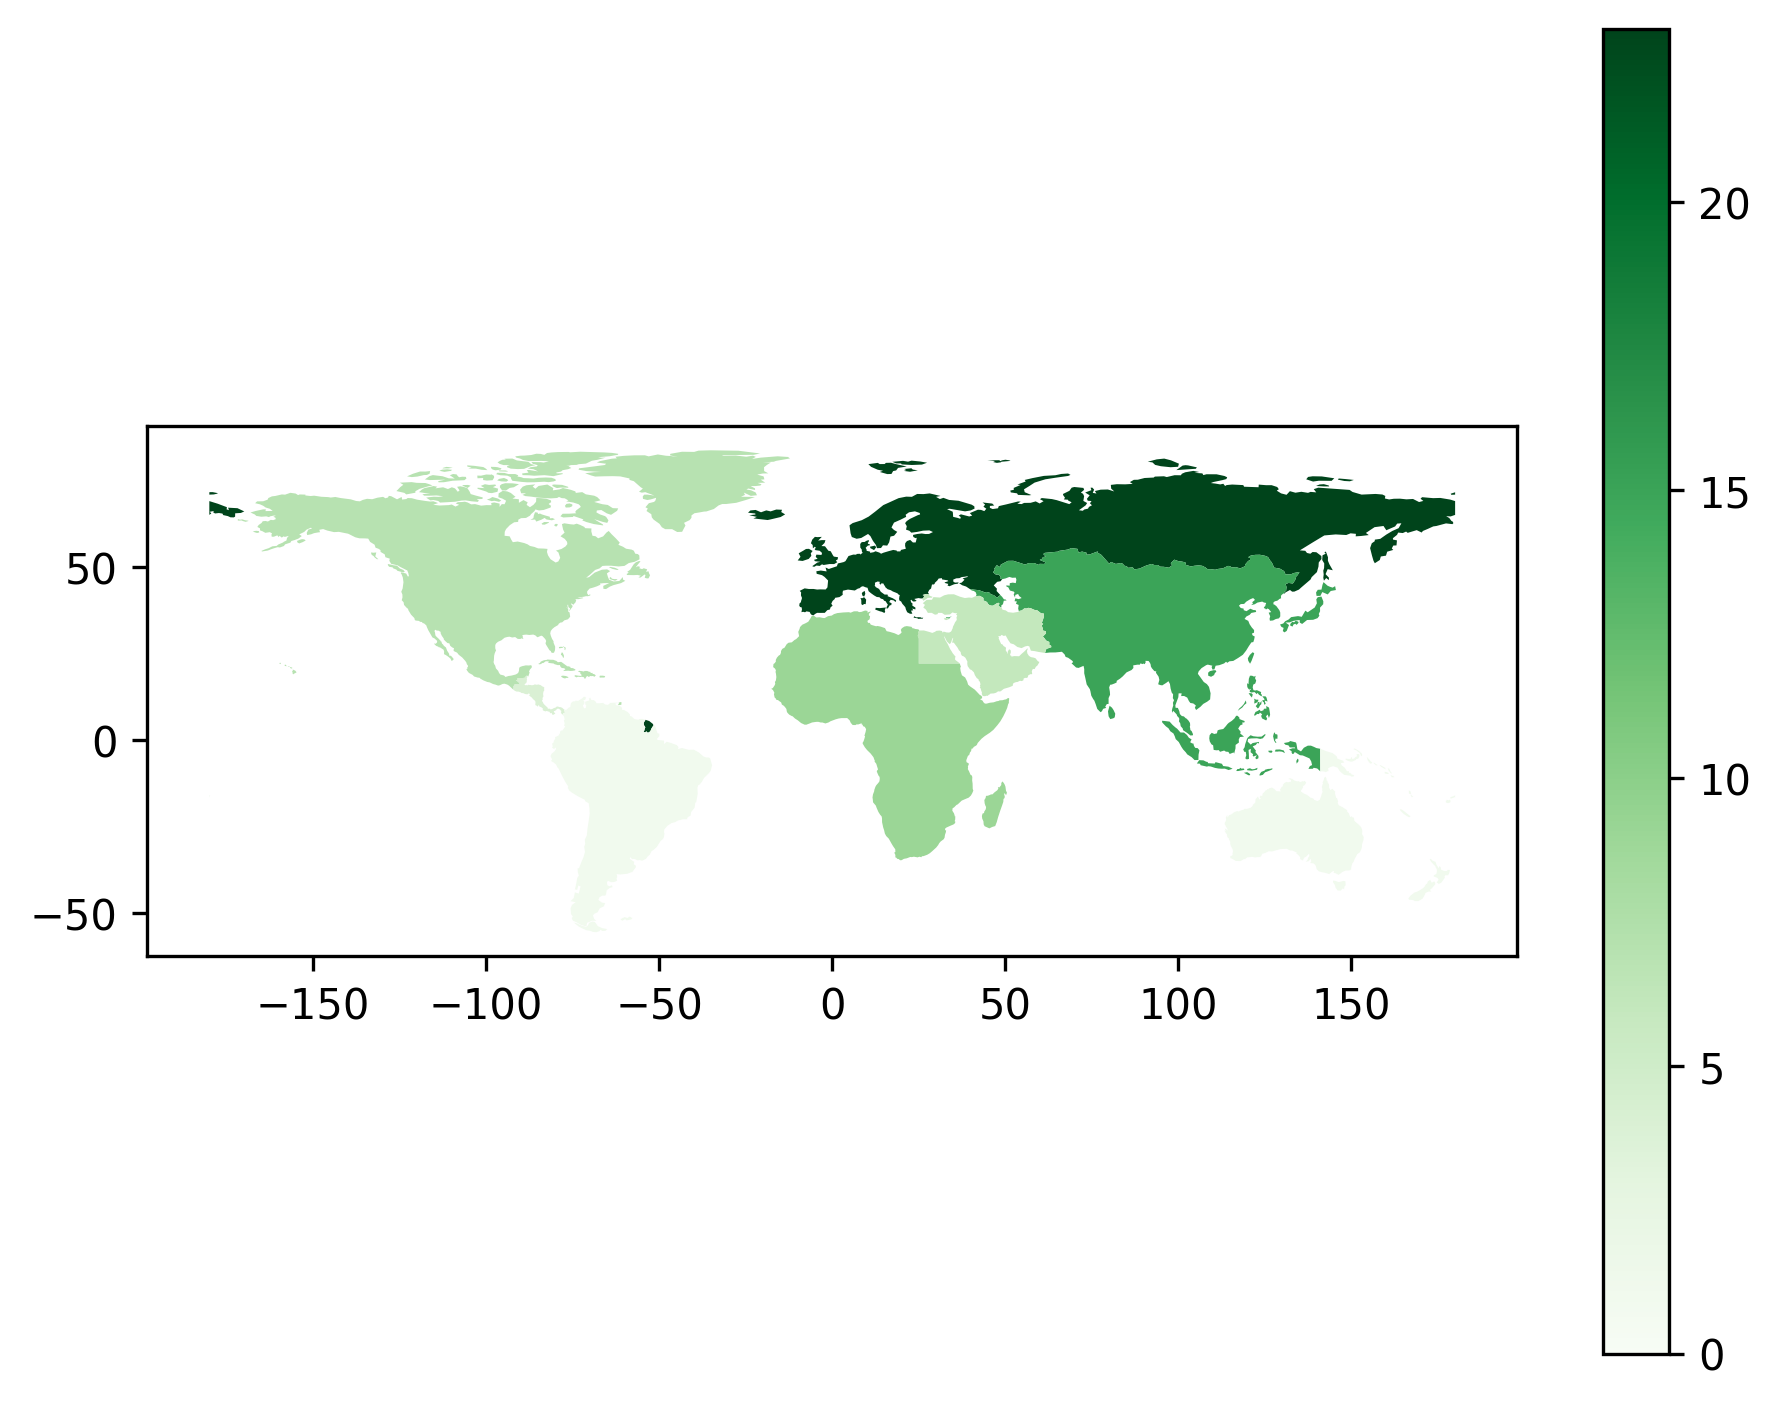

In [69]:
merged_regions.plot(
    column='Count', 
    legend=True,
    cmap='Greens',
    vmin=0,
)

plt.tight_layout()
plt.savefig(fig_dir + 'communities_map_region.png')
plt.show()

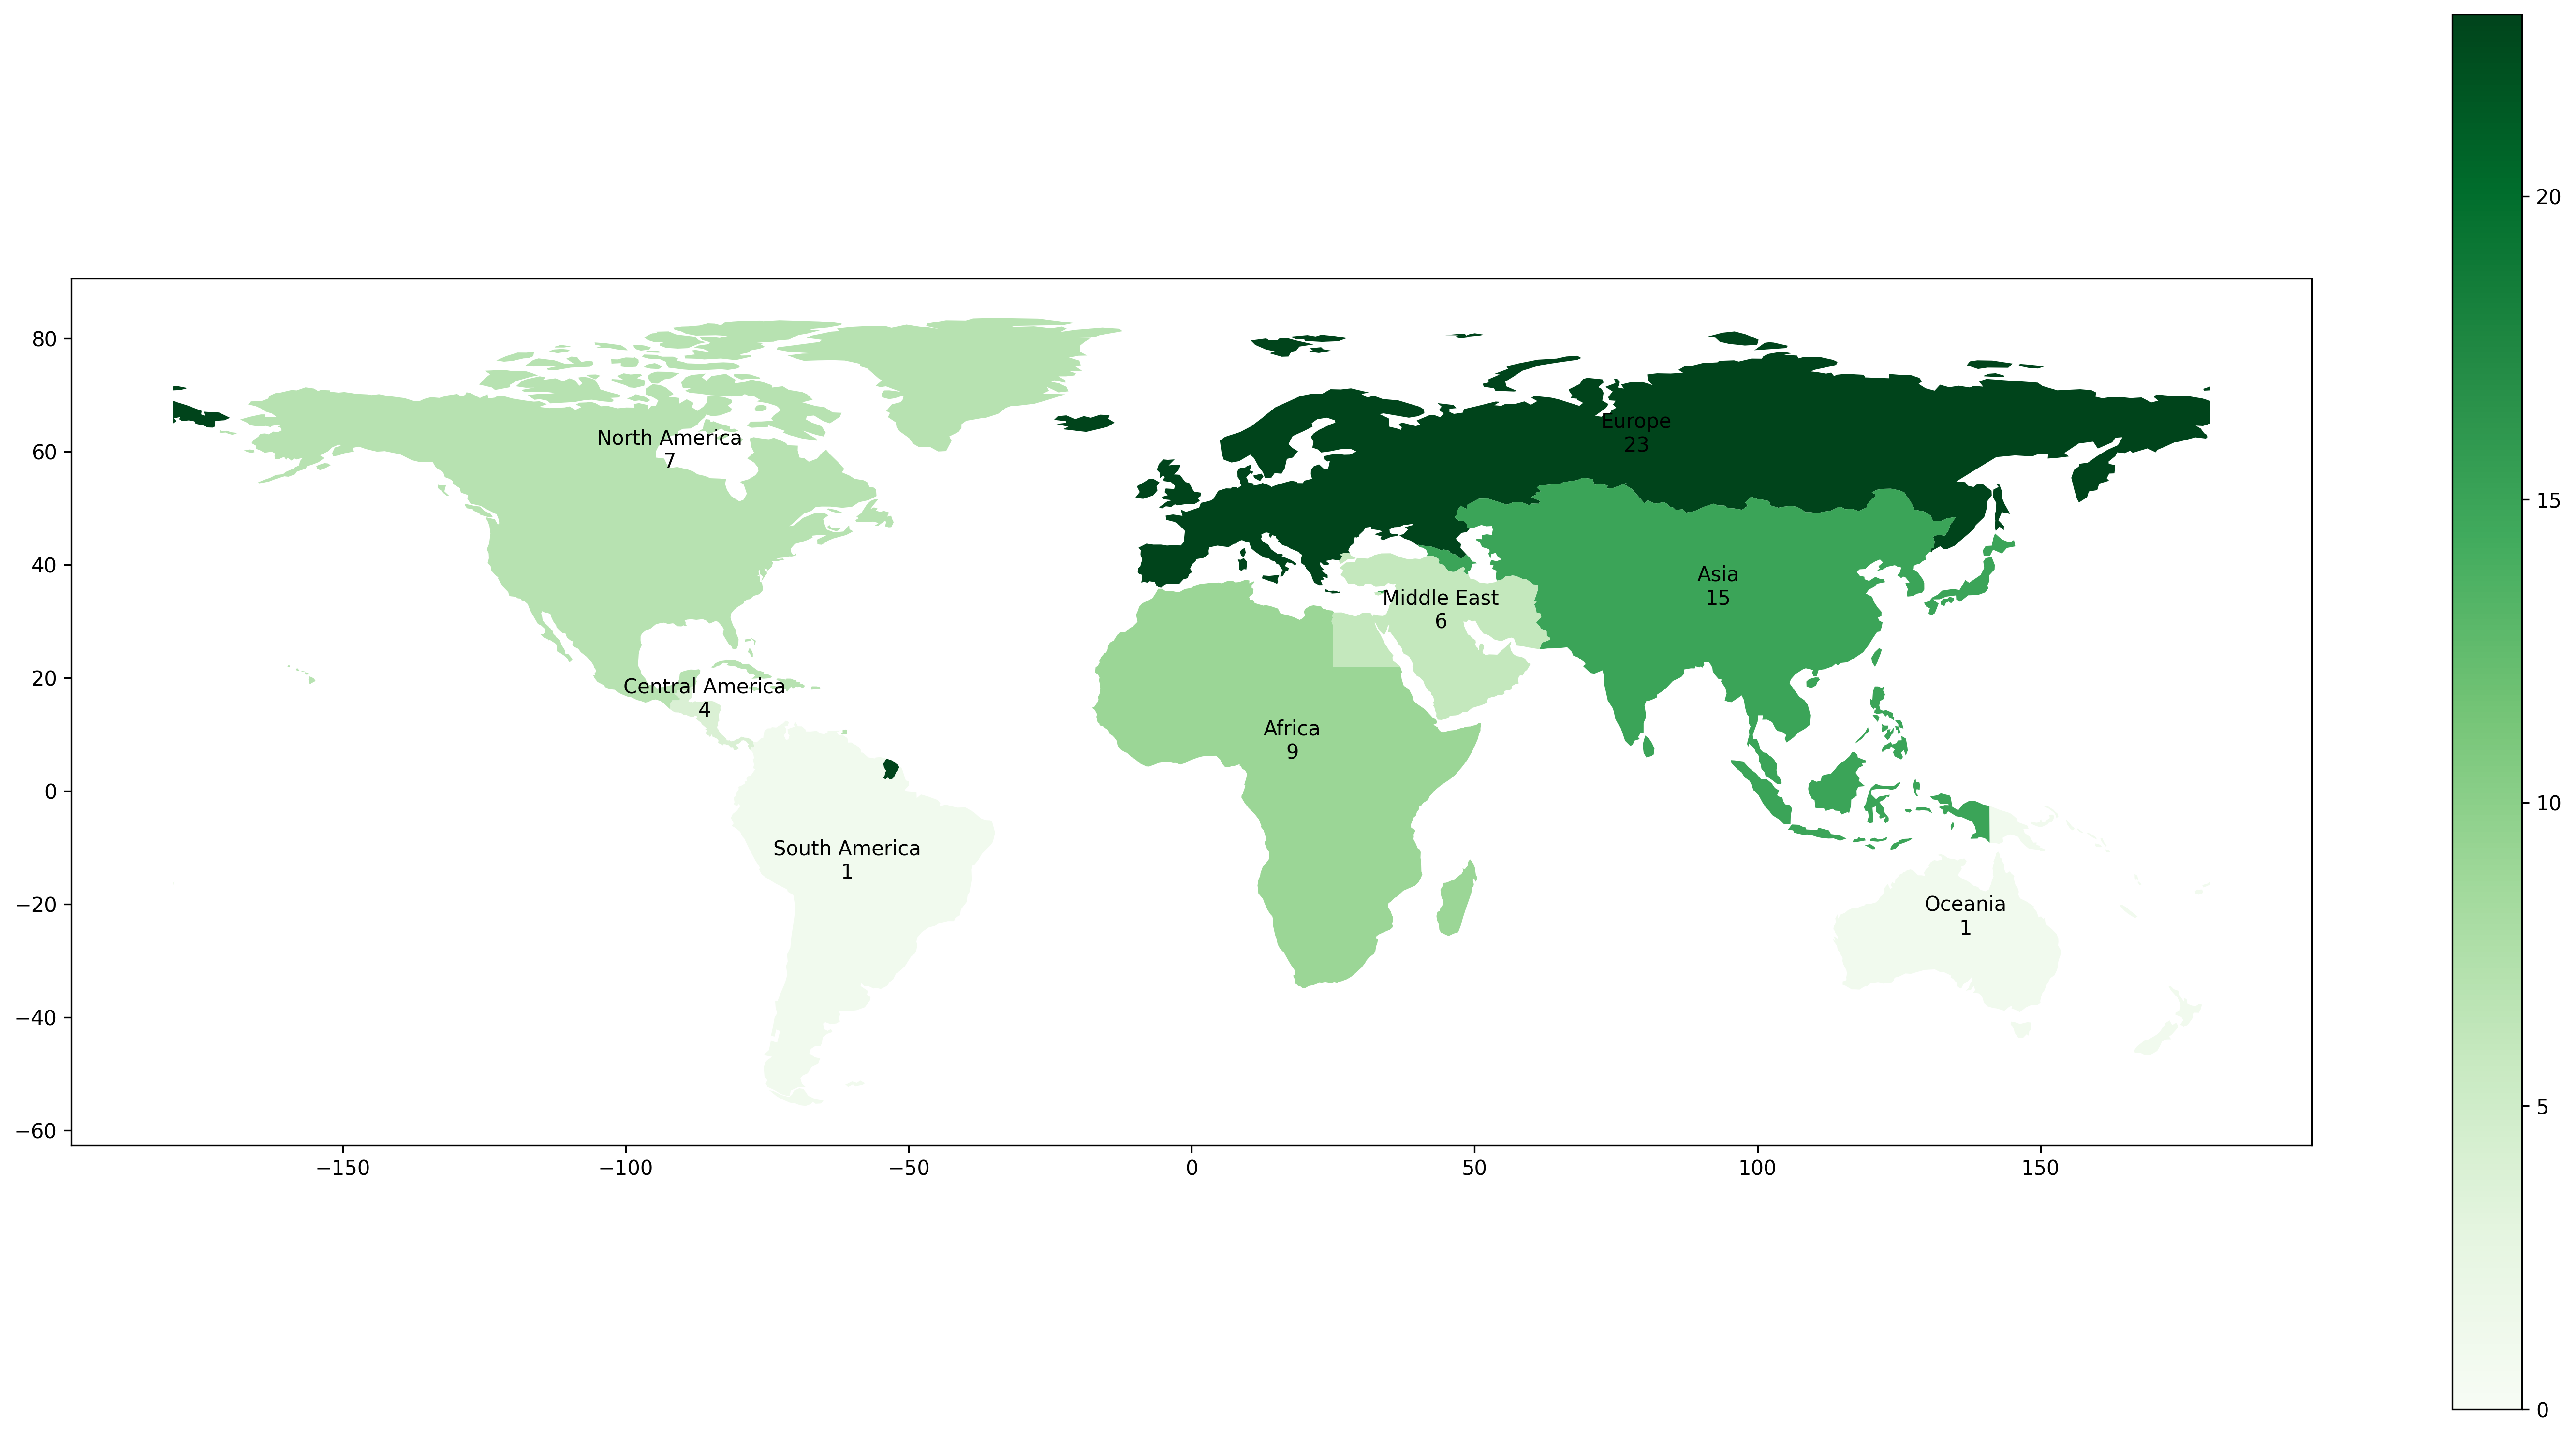

In [70]:
ax = merged_regions.plot(
    column='Count', 
    legend=True, 
    figsize=(20,10),
    cmap='Greens',
    vmin=0,
)

# Annotate
merged_regions.apply(lambda x: ax.annotate(text=x['Region'] + '\n' + str(x['Count']), xy=x.geometry.centroid.coords[0], ha='center'), axis=1)

plt.tight_layout()
plt.savefig(fig_dir + 'communities_map_region_annotated.png')
plt.show()

## Time Span

Note:
- Change Time span to "Time span: Start" and "Time span: Stop"

In [71]:
gov_df['Time span: Start'].value_counts()

Time span: Start
 1900    8
 1800    5
 1700    5
 900     5
 1300    3
 1000    3
-1500    3
 1500    3
 1100    3
 1200    3
-480     2
 930     1
-1800    1
-4100    1
 1600    1
-1550    1
 1400    1
 1081    1
-510     1
-600     1
-200     1
 1450    1
 400     1
-2700    1
-2400    1
-1200    1
-771     1
-400     1
-900     1
-508     1
-1920    1
 0       1
 300     1
-1894    1
Name: count, dtype: int64

<Axes: xlabel='Time span: Start'>

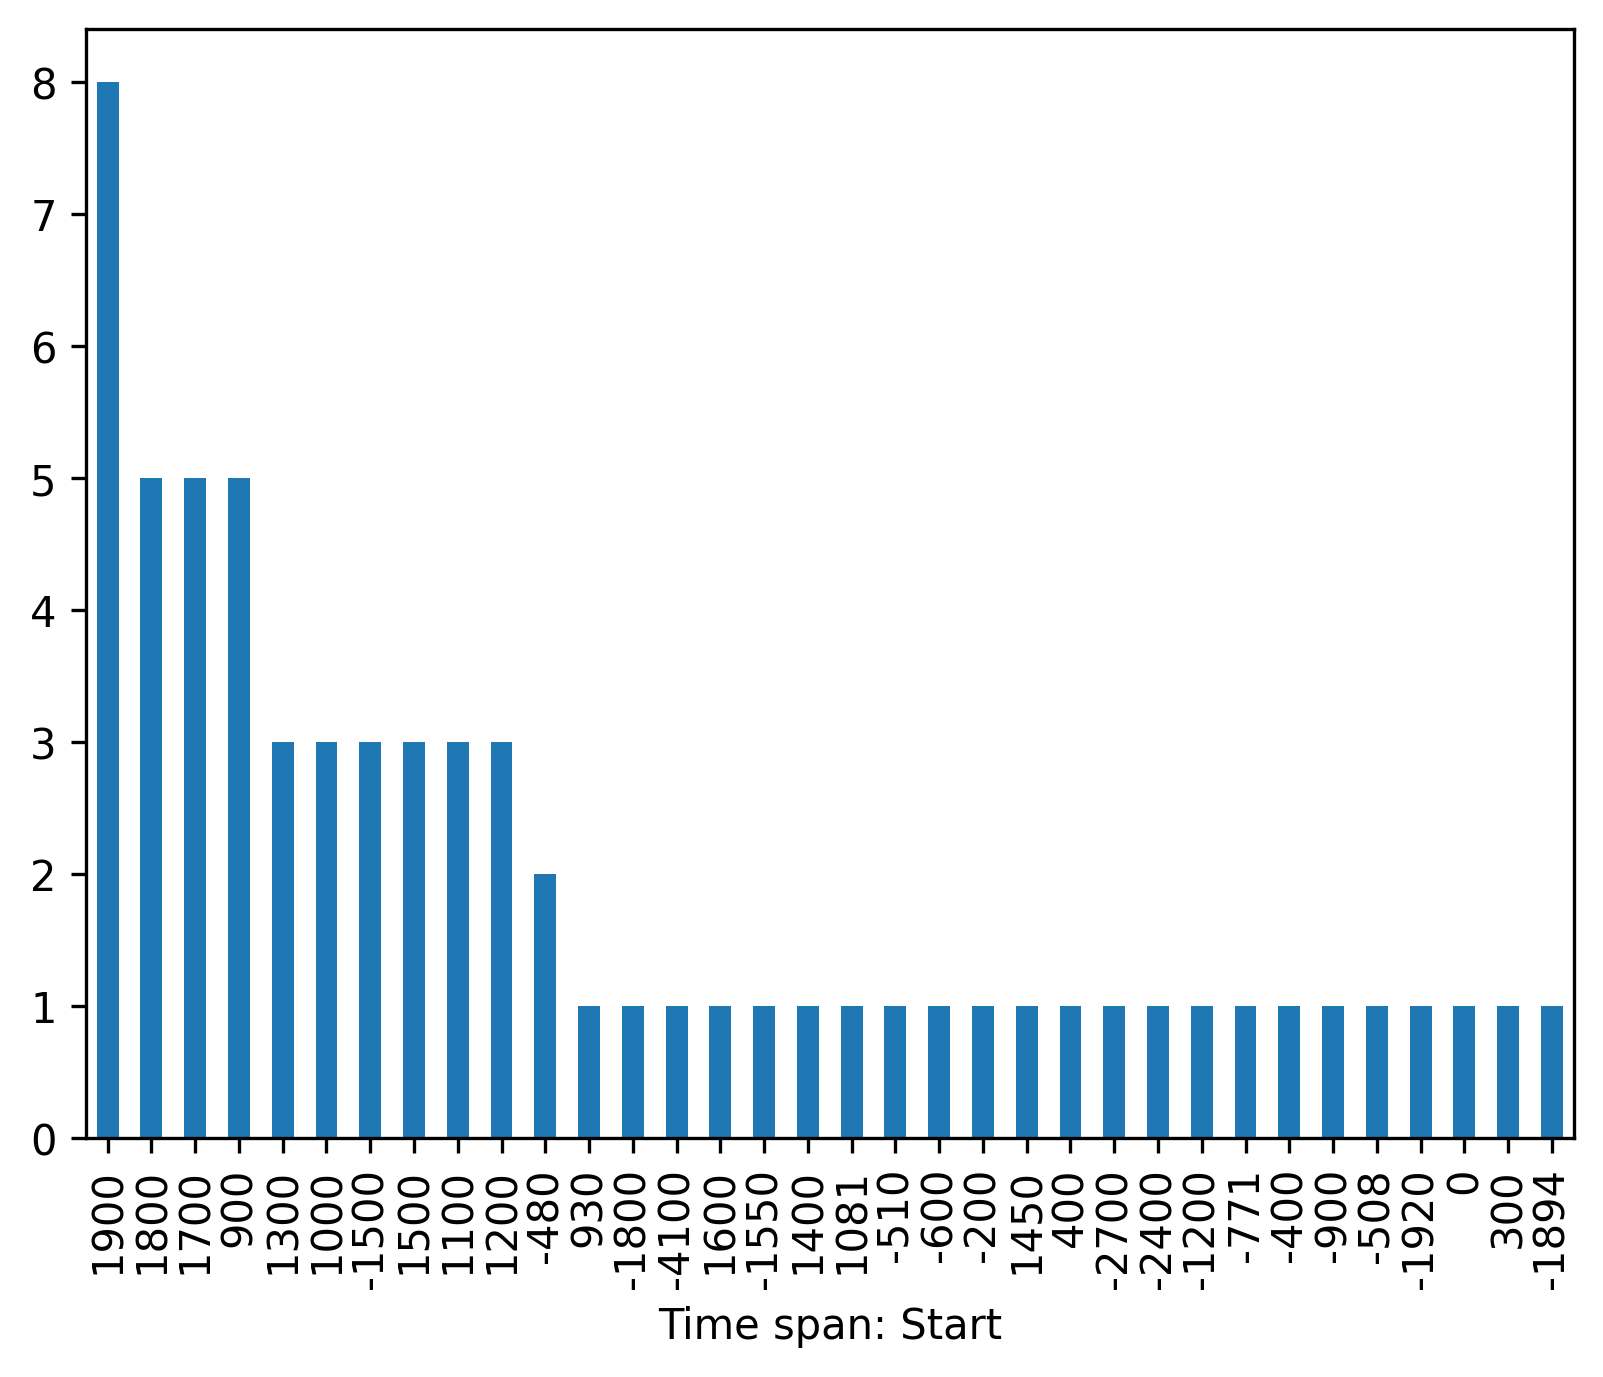

In [72]:
gov_df['Time span: Start'].value_counts().plot(kind='bar')

In [73]:
time_span_start_dates = gov_df['Time span: Start'].unique()

In [74]:
time_span_start_dates_order = sorted(time_span_start_dates)

In [75]:
time_span_start_dates_order

[-4100,
 -2700,
 -2400,
 -1920,
 -1894,
 -1800,
 -1550,
 -1500,
 -1200,
 -900,
 -771,
 -600,
 -510,
 -508,
 -480,
 -400,
 -200,
 0,
 300,
 400,
 900,
 930,
 1000,
 1081,
 1100,
 1200,
 1300,
 1400,
 1450,
 1500,
 1600,
 1700,
 1800,
 1900]

<Axes: xlabel='Time span: Start'>

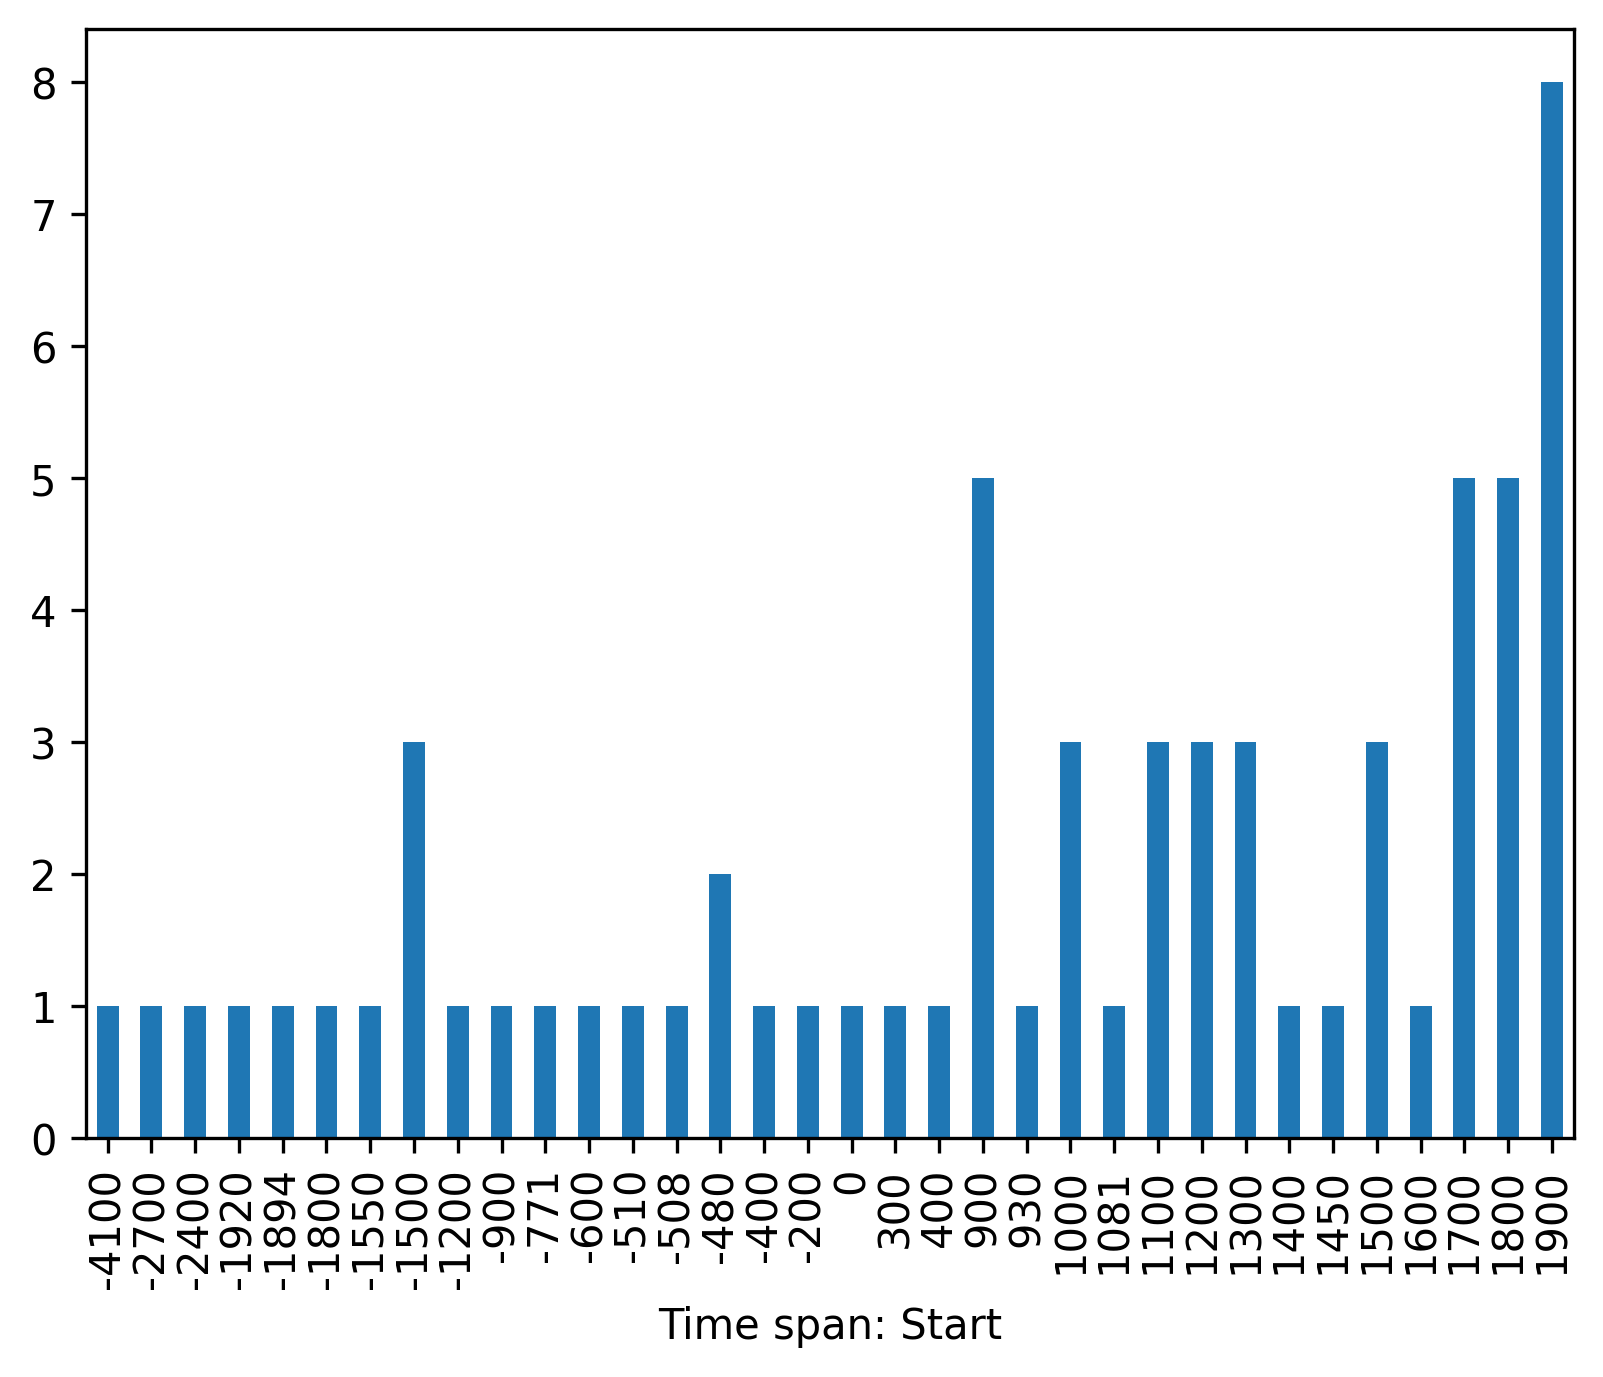

In [76]:
gov_df['Time span: Start'].value_counts().loc[time_span_start_dates_order].plot.bar()

In [77]:
gov_df['Time span: End'].value_counts()

Time span: End
 1900    12
 1800     6
 2023     5
 1600     5
-500      3
-27       3
 2000     3
 1400     3
 1300     2
-300      2
 1200     2
-1760     1
 1560     1
 1521     1
-3300     1
 1262     1
 1406     1
 1804     1
 0        1
-1000     1
 1100     1
-2300     1
-700      1
-221      1
 1500     1
-100      1
-600      1
-322      1
-1800     1
 700      1
-1595     1
Name: count, dtype: int64

<Axes: xlabel='Time span: End'>

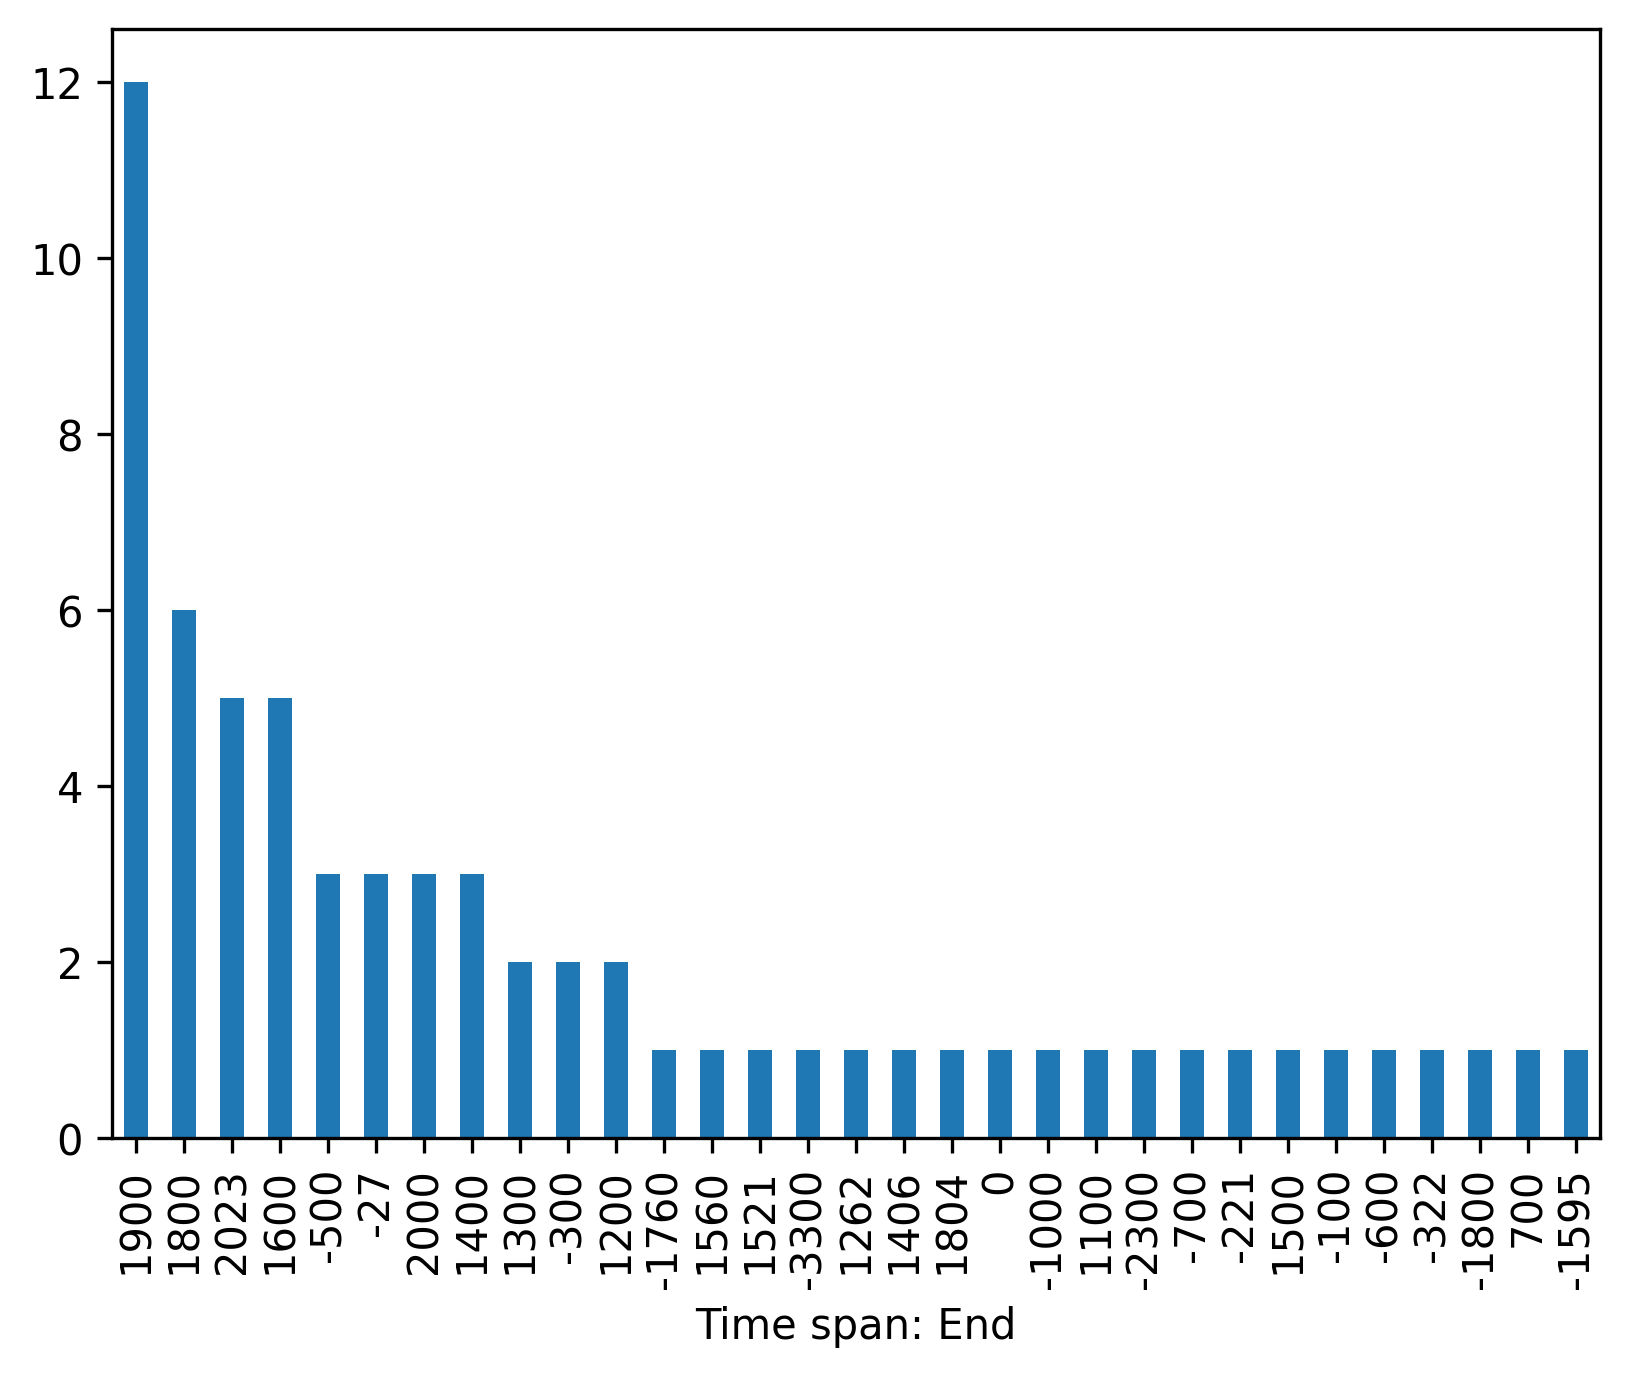

In [78]:
gov_df['Time span: End'].value_counts().plot(kind='bar')

<Axes: xlabel='Time span: End'>

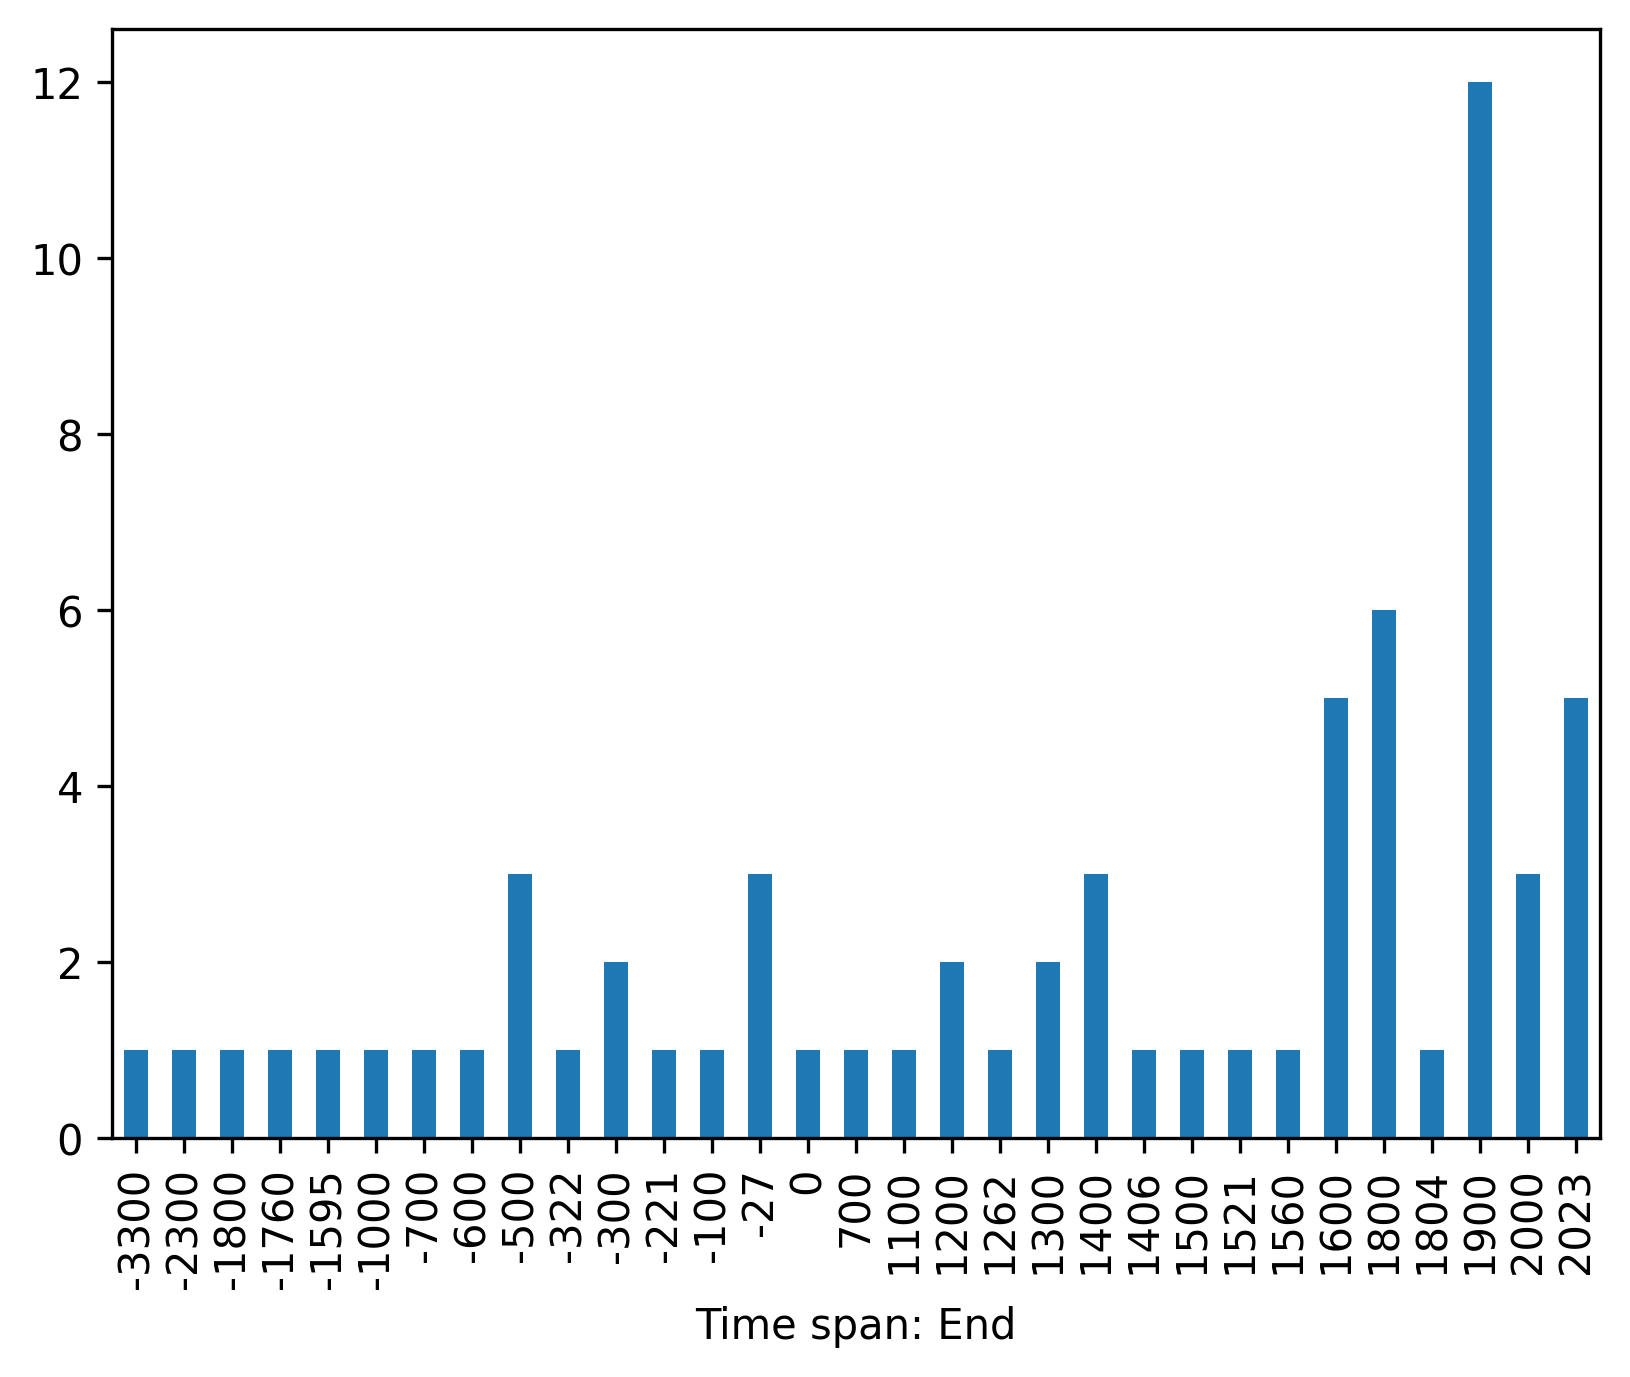

In [79]:
time_span_end_dates = gov_df['Time span: End'].unique()
time_span_end_dates_order = sorted(time_span_end_dates)

gov_df['Time span: End'].value_counts().loc[time_span_end_dates_order].plot.bar()

In [80]:
gov_df[['Time span: Start', 'Time span: End', 'Time span: Duration', 'Name']].head()

Time span: Start  Time span: End  Time span: Duration  \
0              -200               0                  200   
1              1900            2023                  123   
2               300            1200                  900   
3                 0             700                  700   
4             -1920           -1800                  120   

                    Name  
0  Aedui (Celtic Oppida)  
1                   Akha  
2                 Amalfi  
3            Arab nomads  
4                  Assur

In [81]:
dates_df = gov_df[['Time span: Start', 'Time span: Duration', 'Name']]

In [82]:
dates_df.head()

Time span: Start  Time span: Duration                   Name
0              -200                  200  Aedui (Celtic Oppida)
1              1900                  123                   Akha
2               300                  900                 Amalfi
3                 0                  700            Arab nomads
4             -1920                  120                  Assur

In [83]:
dates_tuples = [tuple(x) for x in dates_df.to_numpy()]

In [84]:
dates_tuples

[(-200, 200, 'Aedui (Celtic Oppida)'),
 (1900, 123, 'Akha'),
 (300, 900, 'Amalfi'),
 (0, 700, 'Arab nomads'),
 (-1920, 120, 'Assur'),
 (-508, 186, 'Athens (Classical Period)'),
 (1100, 500, 'Aztec City-States'),
 (-900, 300, 'Babylonia'),
 (-400, 300, 'Carthage'),
 (900, 600, 'Central African communities'),
 (-771, 550, 'China (Spring and Autumn)'),
 (-1200, 500, 'Circassians'),
 (1200, 200, 'Cologne'),
 (900, 300, 'Communes (Medieval Europe)'),
 (1500, 300, 'Dutch Republic'),
 (-2400, 100, 'Ebla '),
 (-2700, 1700, 'Egypt '),
 (400, 700, 'England (Anglo Saxon)'),
 (1900, 100, 'G/wi'),
 (1300, 300, 'Genoa (doge)'),
 (1000, 300, 'Genoa (podesta)'),
 (-480, 453, 'Greek democracies'),
 (-480, 453, 'Greek oligarchies'),
 (1100, 700, 'Haudenosanee (Iroquois)'),
 (1450, 354, 'Hausa City-States'),
 (1900, 123, 'Hmong villages'),
 (930, 332, 'Iceland '),
 (900, 660, 'Igbo People'),
 (1400, 500, 'Ijo of the Eastern Niger Delta'),
 (1200, 600, 'Imperial and Free Towns of the Holy Roman Empire'),


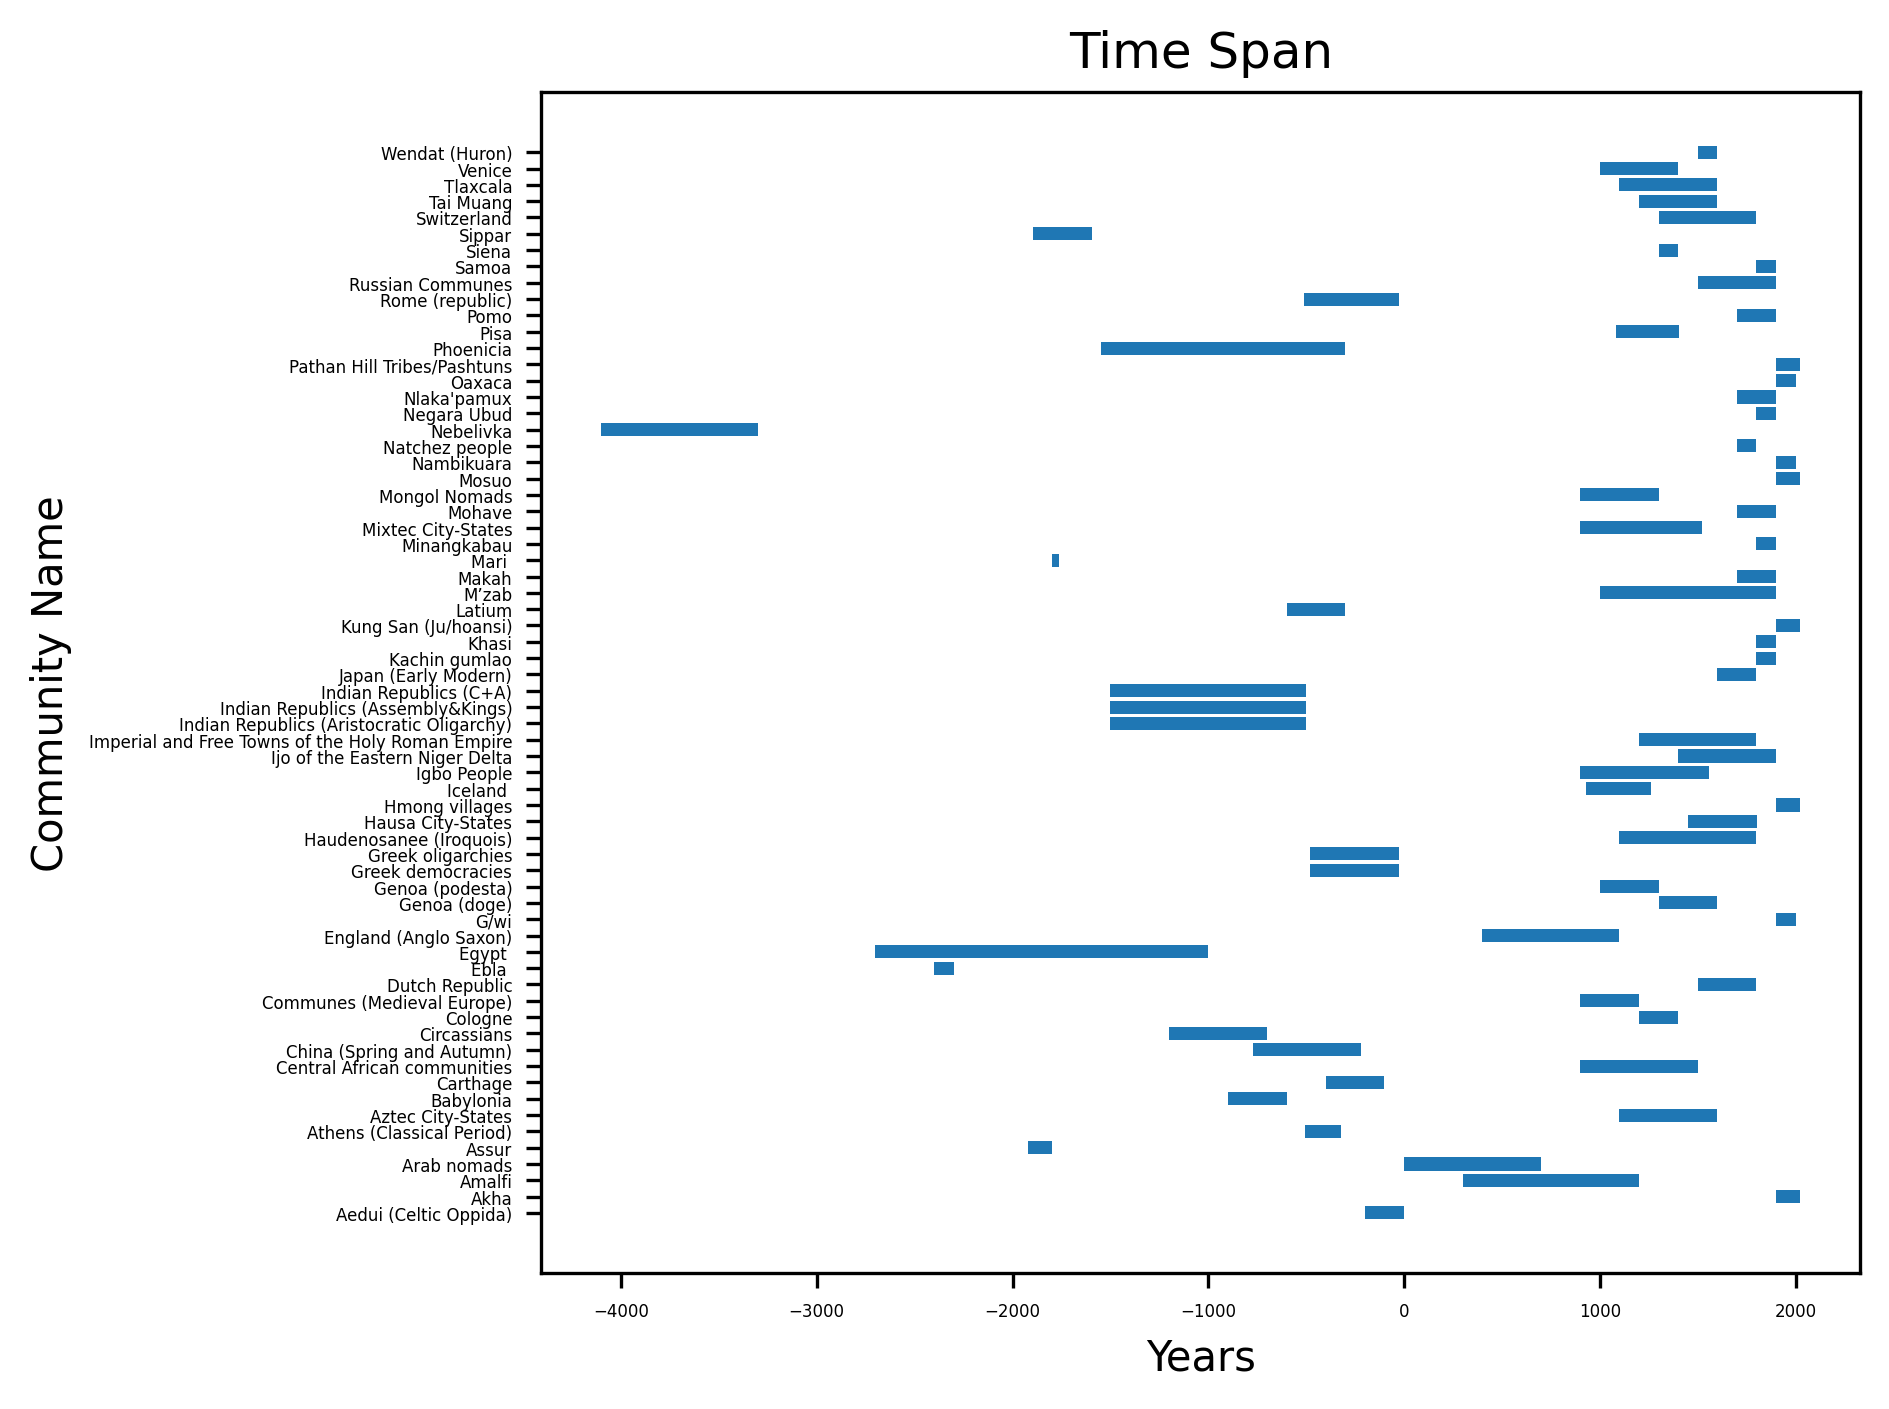

In [85]:
# create figure and plot
fig, ax = plt.subplots()
labels = []
for i, (start, duration, label) in enumerate(dates_tuples):
    labels.append(label)
    ax.broken_barh([(start, duration)], (i-0.4,0.8))

# set yticks at the middle of the bars
ax.set_yticks(range(len(dates_tuples)))
ax.set_yticklabels(labels)
ax.tick_params(axis='both', which='major', labelsize=4)

ax.set_xlabel('Years')
ax.set_ylabel('Community Name')

plt.title('Time Span')
# plt.grid(True)
# plt.figure(figsize=(80, 80))

plt.tight_layout()
plt.savefig(fig_dir + 'communities_timeline.png')
plt.show()

/ Notes / TODO:
- x Mechanisms, Institution, Culture/Norms etc. 
- x Plot time span 
- Cluster communities by similarity (PCA) - can check w Seth
- CGI-specific analyses 

/
- Address remaining questions in doc: https://docs.google.com/document/d/1f1Qa25OGWWrvK5xrZjuLeqYn4WkgnyUH/edit
- CGIs: 
  - what do CGIs look like? 
  - How are they connected with other institutions? 
  - How many cgis per community, on average? 
  - how many non cgis, on average? How many institutions per community, on average? 
  - Does the variation interact with size, time or space?
  - Identify patterns in terms of:
      - Functions of the CGI
      - Level of jurisdiction (local/central) and membership (elite/commoners)
      - Within a type of CGI (say, assembly), what are the main sources of variation in terms of function and membership?
      - Possible interactions with size
  
- Mechanisms:
  - How many mechanisms in CGIs, on average? 
  - how many mechanisms in the community? 
  - What mechanisms prevail? 
  - What mechanisms prevail in CGIs compared to non-CGIs?
  - Does the variation interact with size, time or space?
  
- Region:
  - can we identify any regional characteristics? 
  - We should also provide a simple breakdown of each of the three features (time, place, size). 
  - How many communities in each?

/
- CGI network structures?

### TODO 

1. Finish descriptive analysis 
- x CGI analysis -- histogram for mechanisms
- x Timeline plotting 
- x Geography mapping
- x Clean up + reformat size


2. Mechanisms analysis 
- Mechanisms x geography, mechanisms x time, mechanisms x size


3. CGI Analysis 
- CGI-mechanism histogram 
- CGI Mechanisms x geography, mechanisms x time, mechanisms x size
- Correlation matrices for mechanisms and CGI mechanisms


4. Similarity clustering 
- Similarity clustering for Communities 

# Pairplots

In [94]:
# data_df = gov_df.select_dtypes(include=[np.number]).dropna()

In [88]:
# sns.pairplot(data_df)

## TODO: Clustering communities by similarity